## Introduction

#### Build a Machine Learning model to predict the CTR(click through rate) of an email campaign based on the email campaigning information.

### Import the necessary packages.

In [ ]:
!pip install -q klib

     |████████████████████████████████| 133 kB 46.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
from matplotlib import pyplot as plt # visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re
import klib

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Import train and test dataset

In [ ]:
train=pd.read_csv("/content/gdrive/MyDrive/AV_job-a-thon-august-2022/train_F3fUq2S.csv")
test=pd.read_csv("/content/gdrive/MyDrive/AV_job-a-thon-august-2022/test_Bk2wfZ3.csv")

### Structure of the train and test dataset.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

#### The above information shows that there are 1888 data entries and 22 columns.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   campaign_id         762 non-null    int64 
 1   sender              762 non-null    int64 
 2   subject_len         762 non-null    int64 
 3   body_len            762 non-null    int64 
 4   mean_paragraph_len  762 non-null    int64 
 5   day_of_week         762 non-null    int64 
 6   is_weekend          762 non-null    int64 
 7   times_of_day        762 non-null    object
 8   category            762 non-null    int64 
 9   product             762 non-null    int64 
 10  no_of_CTA           762 non-null    int64 
 11  mean_CTA_len        762 non-null    int64 
 12  is_image            762 non-null    int64 
 13  is_personalised     762 non-null    int64 
 14  is_quote            762 non-null    int64 
 15  is_timer            762 non-null    int64 
 16  is_emoticons        762 no

#### The above information shows that there are 762 data entries and 21 columns.

### Let's see is there any missing values in train and test dataset by column wise.

In [ ]:
train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

#### The above information shows that there are no missing values.

In [ ]:
test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

#### The above information shows that there are no missing values.

### Let's see the glimpse of train dataset

In [ ]:
train.head(2)

campaign_id  sender  subject_len  body_len  mean_paragraph_len  \
0            1       3           76     10439                  39   
1            2       3           54      2570                 256   

   day_of_week  is_weekend times_of_day  category  product  ...  is_image  \
0            5           1         Noon         6       26  ...         0   
1            5           1      Morning         2       11  ...         0   

   is_personalised  is_quote  is_timer  is_emoticons  is_discount  is_price  \
0                0         0         0             0            0         0   
1                0         0         0             0            0         0   

   is_urgency  target_audience  click_rate  
0           0               14    0.103079  
1           0               10    0.700000  

[2 rows x 22 columns]

### Let's create a function to display the catgeorical column level counts.

In [ ]:
def count_plot(df,col,rot=None,switchax=None,size=(8,6),title=''):
  _=plt.figure(figsize=size)
  if switchax:
     _=sns.countplot(y=df[col],order=df[col].value_counts().index);
     _=plt.title(title,fontsize=25)
     _=plt.ylabel(col,fontsize=20)
     _=plt.yticks(fontsize=14,rotation=rot)   
  
  else:
     _=sns.countplot(x=df[col],order=df[col].value_counts().index);
     _=plt.title(title,fontsize=25)
     _=plt.xlabel(col,fontsize=20)
     _=plt.xticks(fontsize=14,rotation=rot)   
  

### Let's create a function to display the group by catgeorical column level counts.

In [ ]:
def grp_count_plot(df,col,grp,rot=None,switchax=None,size=(10,8),title=''):
  _=plt.figure(figsize=size)
  if switchax:
    g=sns.countplot(y=df[col],hue=df[grp],order=df[col].value_counts().index );
    g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
    _=plt.title(title,fontsize=25)
    _=plt.ylabel(col.capitalize(),fontsize=20)
    _=plt.yticks(fontsize=14,rotation=rot)
  else:
    g=sns.countplot(x=df[col],hue=df[grp],order=df[col].value_counts().index );
    g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
    _=plt.title(title,fontsize=25)
    _=plt.xlabel(col.capitalize(),fontsize=20)
    _=plt.xticks(fontsize=14,rotation=rot)

 

### Let's create a function for box plot.

In [ ]:
def box_plot(df,col,rot=None):
  _=plt.figure(figsize=(8,6))
  _=sns.boxplot(y=df[col])
  _=plt.title(col.capitalize()+" Distribution",fontsize=25)
  _=plt.ylabel(col,fontsize=20,rotation=rot)
  _=plt.yticks(fontsize=14)


### Let's create a function for side by side plot(density and group-wise boxplot).

In [ ]:
def side_by_side_plot(df,grp,valcol,rot=None):
  clr="Paired"
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
  fig.tight_layout()
  sns.kdeplot(x=df[valcol], hue=df[grp],ax=ax1,palette=clr)
  ax1.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
  ax1.set_xlabel(valcol,fontsize=20)
  sns.boxplot(x=df[grp],y=df[valcol],ax=ax2,palette=clr)
  ax2.set_title(grp.capitalize()+" Wise "+valcol.capitalize()+" Distribution",size=15)
  ax2.set_xlabel(grp,fontsize=20)
  ax2.tick_params(rotation=rot)

### Let's create a function for group by numerical summary.

In [ ]:
def group_summary(df,groupcol,value):
    return df.groupby(groupcol)[value].describe().reset_index().sort_values('mean',ascending=False)

In [ ]:
def group_by_perc(df,grp,target):
  return df.groupby([grp,target])[target].agg({'count'}).reset_index().assign(percentage=lambda x:round(x['count']*100/x['count'].sum(),2)).sort_values('percentage',ascending=False)

### Let's see the email campaigning click rate distribution.

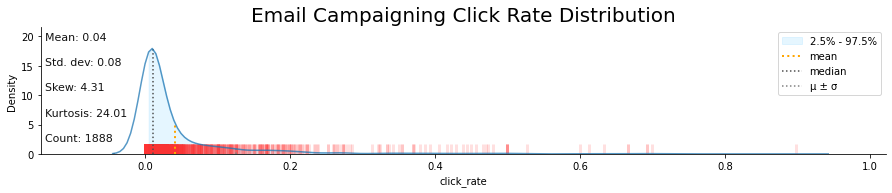

In [ ]:
klib.dist_plot(train['click_rate']);
plt.title("Email Campaigning Click Rate Distribution",fontsize=20);

In [ ]:
train['click_rate'].describe()

count    1888.000000
mean        0.041888
std         0.084223
min         0.000000
25%         0.005413
50%         0.010686
75%         0.035589
max         0.897959
Name: click_rate, dtype: float64

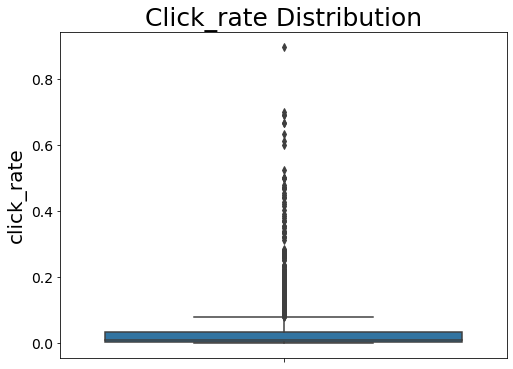

In [ ]:
box_plot(train,'click_rate',rot=90)

#### The above histogram explains that the click rate column is positively skewed(mean>median).

#### The click rate ranges from 0.0 to 0.898.

#### The average click rate is 0.042.

#### The boxplot explains that there are outliers above the third quartile.

### Let's see various senders and see their click rates distribution.

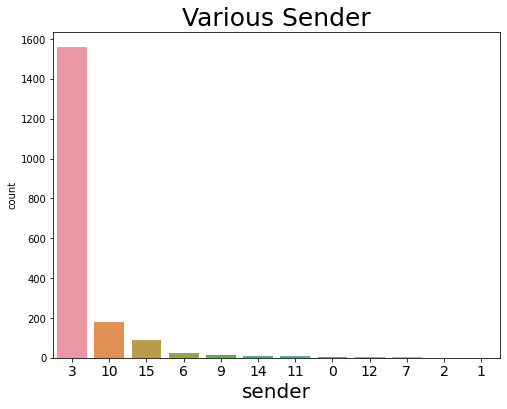

In [ ]:
count_plot(train,'sender' ,title='Various Sender')

In [ ]:
train['sender'].value_counts()

3     1559
10     181
15      89
6       22
9       13
14       7
11       7
0        3
12       3
7        2
2        1
1        1
Name: sender, dtype: int64

#### The above plot and summary explain that the more number of email campaigning from sender 3.

### Let's see click rate distribution of various sender.

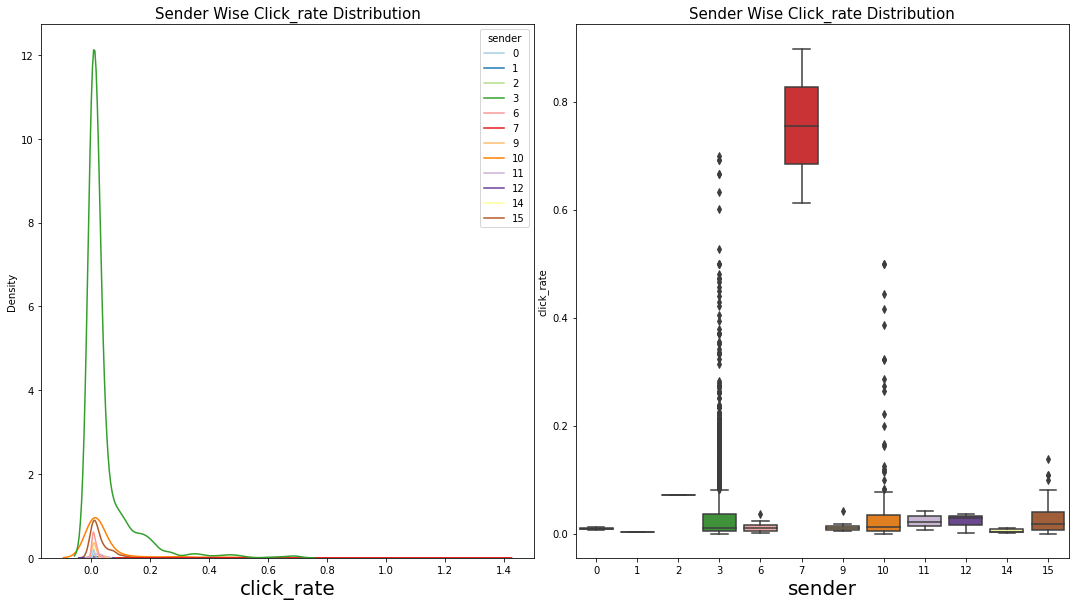

In [ ]:
side_by_side_plot(train,'sender','click_rate')

In [ ]:
group_summary(train,'sender','click_rate')

sender   count      mean       std       min       25%       50%  \
5        7     2.0  0.755213  0.201874  0.612466  0.683839  0.755213   
2        2     1.0  0.070796       NaN  0.070796  0.070796  0.070796   
7       10   181.0  0.043450  0.089115  0.000000  0.005238  0.011674   
3        3  1559.0  0.042660  0.083053  0.000000  0.005375  0.010457   
11      15    89.0  0.027220  0.029321  0.000000  0.005952  0.017509   
8       11     7.0  0.022946  0.012959  0.006959  0.013620  0.020846   
9       12     3.0  0.022175  0.018349  0.001519  0.014970  0.028421   
6        9    13.0  0.012500  0.009476  0.004819  0.006914  0.010511   
4        6    22.0  0.011454  0.008106  0.001657  0.005516  0.009669   
0        0     3.0  0.009385  0.002806  0.007479  0.007774  0.008068   
10      14     7.0  0.005184  0.003296  0.000915  0.003202  0.003613   
1        1     1.0  0.002660       NaN  0.002660  0.002660  0.002660   

         75%       max  
5   0.826586  0.897959  
2   0.070796  0.070796  
7   0.035207  0.500000  
3   0.036018  0.700000  
11  0.039801  0.137931  
8   0.031760  0.042056  
9   0.032503  0.036585  
6   0.013853  0.040923  
4   0.015865  0.036000  
0   0.010338  0.012607  
10  0.007718  0.009916  
1   0.002660  0.002660

#### The above chart and summary explain that the email campaigning sent from sender 7 has the highest click rate.

#### The average click rate for the email campaigning sender from sender 3 is 0.043.

### Let's see the number of characters in the subject and see is there any relationship between the number of characters in the email subject and click rate.

In [ ]:
train['subject_len'].nunique()

170

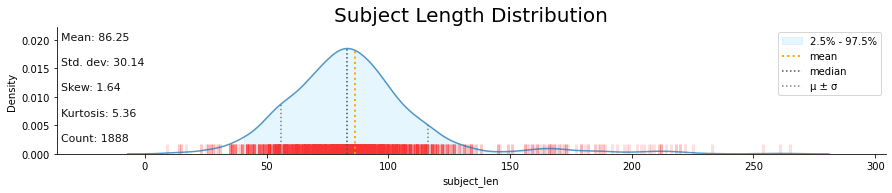

In [ ]:
klib.dist_plot(train['subject_len']);
plt.title("Subject Length Distribution",fontsize=20);

In [ ]:
train['subject_len'].describe()

count    1888.000000
mean       86.246292
std        30.143206
min         9.000000
25%        69.000000
50%        83.000000
75%        98.000000
max       265.000000
Name: subject_len, dtype: float64

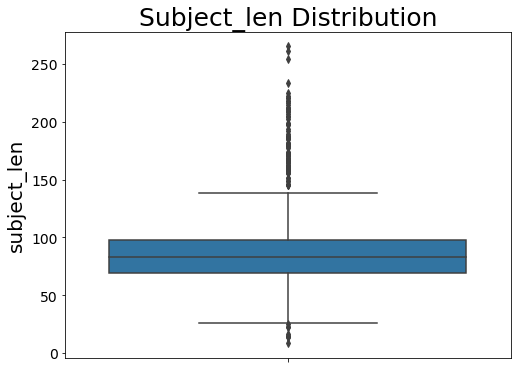

In [ ]:
box_plot(train,'subject_len',rot=90)

#### The above histogram explains that the email subject length column is normally distributed.

#### The number of characters in the email subject ranges from 9 to 265.

#### The average number of characters in the email subject is 86.

#### The boxplot explains that there are outliers above the third quartile and below the first quartile.

### Let's see if is there any relationship between different email campaigning sender's subject length and click rate.

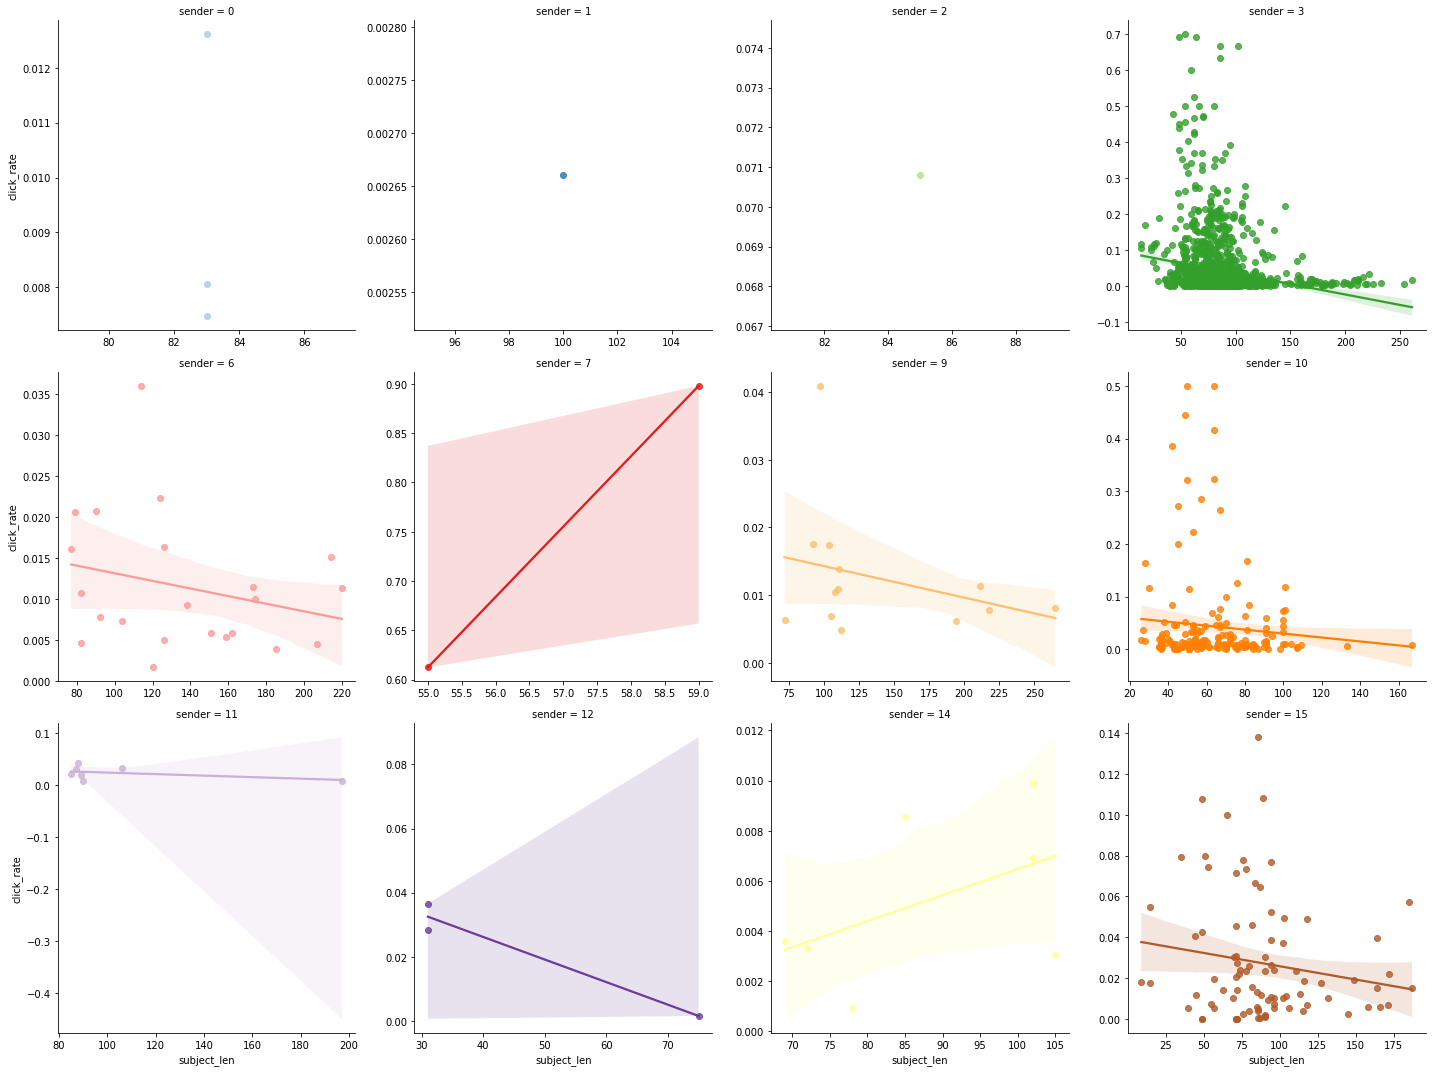

In [ ]:
sns.lmplot(data=train, x="subject_len", y="click_rate",hue='sender',
           col='sender',col_wrap=4,sharex=False,sharey=False,palette='Paired');


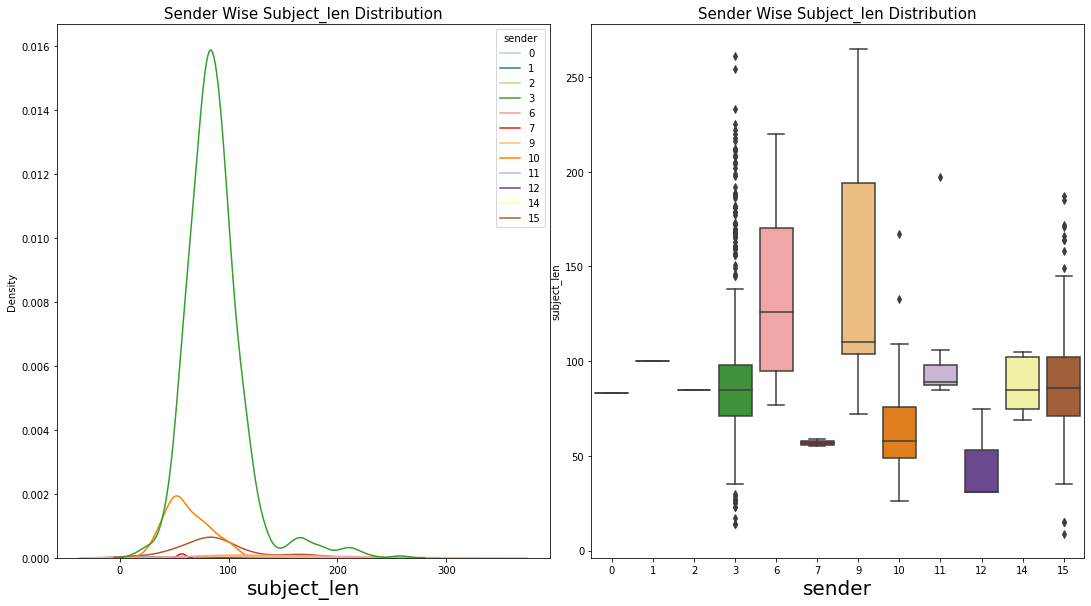

In [ ]:
side_by_side_plot(train,'sender','subject_len')

#### The above plot explains that the most email campaigning from the senders 3, 10, and 15. The email subject length and click rate have a negative relationship(if email subject length increases the click rate score will decrease).

#### There are outliers in email subject length that are sent from senders 3, 10, and 15.

### Let's average the number of characters in the paragraph of email and see are there any relationship between the average number of characters in the paragraph of email and click rate.

In [ ]:
train['mean_paragraph_len'].nunique()

121

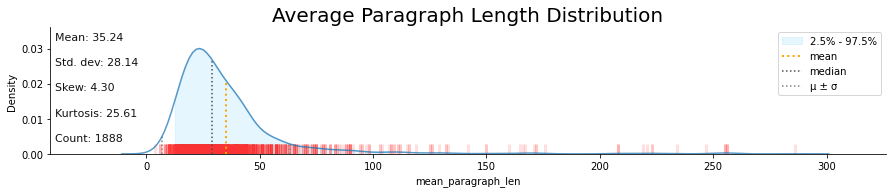

In [ ]:
klib.dist_plot(train['mean_paragraph_len']);
plt.title("Average Paragraph Length Distribution",fontsize=20);

In [ ]:
train['mean_paragraph_len'].describe()

count    1888.000000
mean       35.239407
std        28.139498
min         4.000000
25%        21.000000
50%        29.000000
75%        40.000000
max       286.000000
Name: mean_paragraph_len, dtype: float64

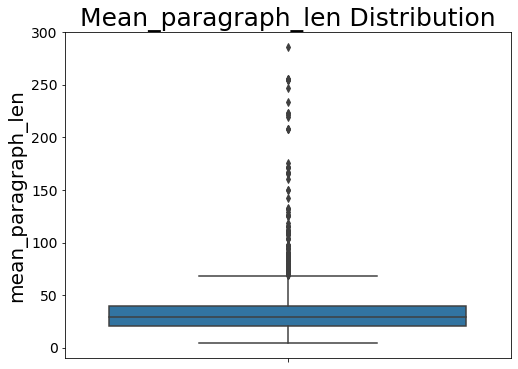

In [ ]:
box_plot(train,'mean_paragraph_len',rot=90)

#### The above histogram explains that the email's average paragraph length column is positively skewed(mean>median).

#### The average number of characters in the paragraph of an email ranges from 4 to 286.

#### The average of average characters in the paragraph of the email is 35.

#### The boxplot explains that there are outliers above the third quartile.

### Let's see if is there any relationship between different email campaigning sender's average paragraph length and click rate.

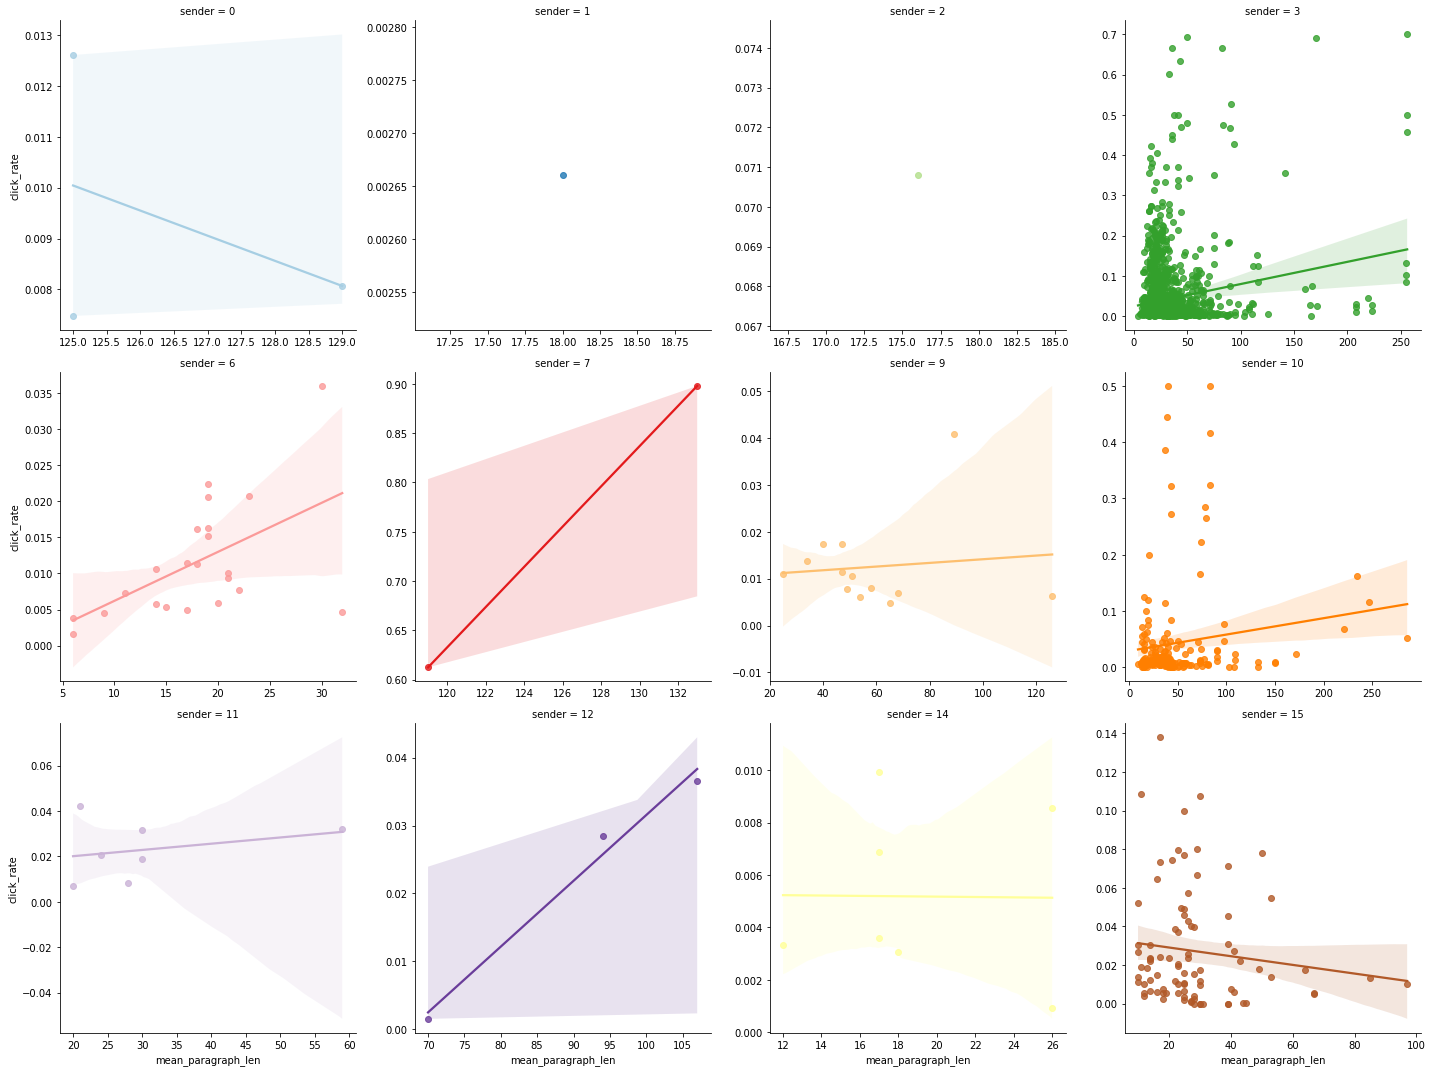

In [ ]:
sns.lmplot(data=train, x="mean_paragraph_len", y="click_rate",hue='sender',
           col='sender',col_wrap=4,sharex=False,sharey=False,palette='Paired');


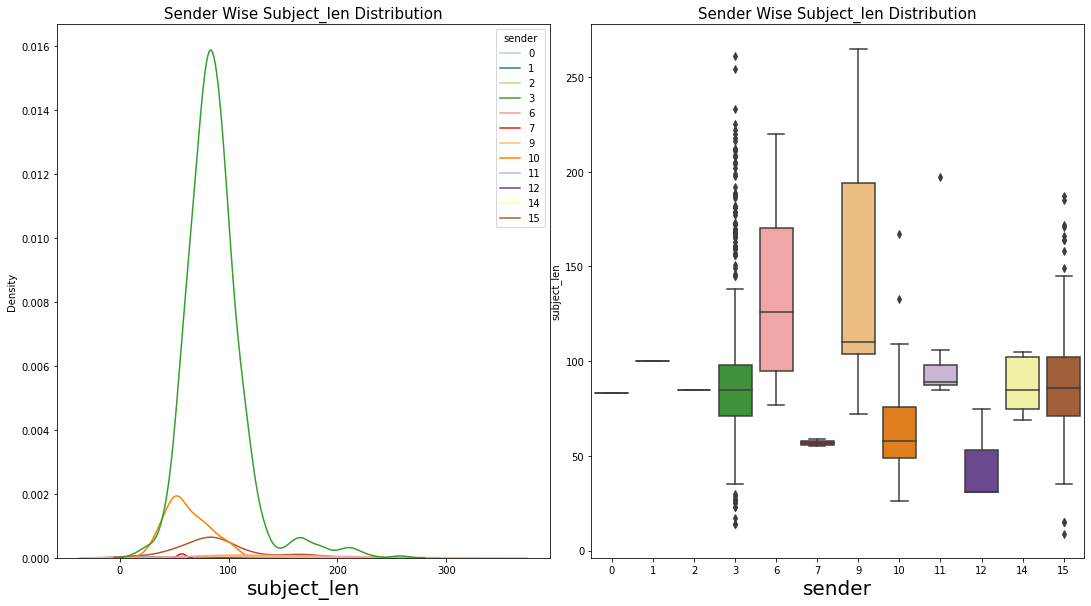

In [ ]:
side_by_side_plot(train,'sender','subject_len')

#### The above plot explains that the most email campaigning from the senders 3, 10, and 15. In sender categories 3, and 10 the email average paragraph length and click rate have a positive relationship(if the email average paragraph length increases the click rate score will also increase).In category 15 the relationship is negative.

#### There are outliers in the email's average paragraph length that are sent from senders 3, 10, 11, and 15.

### Let's see whether the click rate will change on different days of the week.

In [ ]:
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [ ]:
train['day_of_week']=train['day_of_week'].map(days)

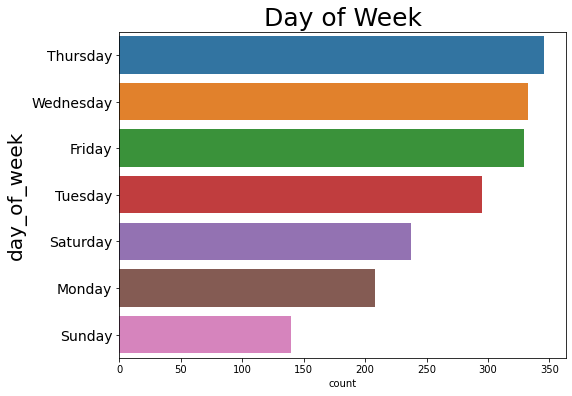

In [ ]:
count_plot(train,'day_of_week' ,title='Day of Week',switchax=True)

In [ ]:
train['day_of_week'].value_counts()

3    346
2    333
4    329
1    295
5    237
0    208
6    140
Name: day_of_week, dtype: int64

#### The above plot and summary explain that the more number of email campaigning from Tuesday to Saturday.

### Let's see the click rate distribution on different days of the week.

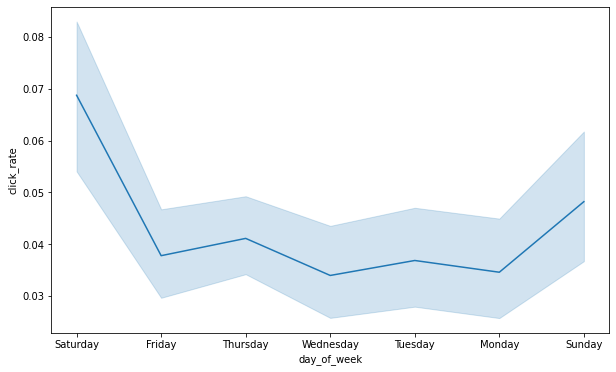

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=train,x='day_of_week',y='click_rate');

#### The above line plot explains that the email campaigning click rate is high on the weekend compared to weekdays.

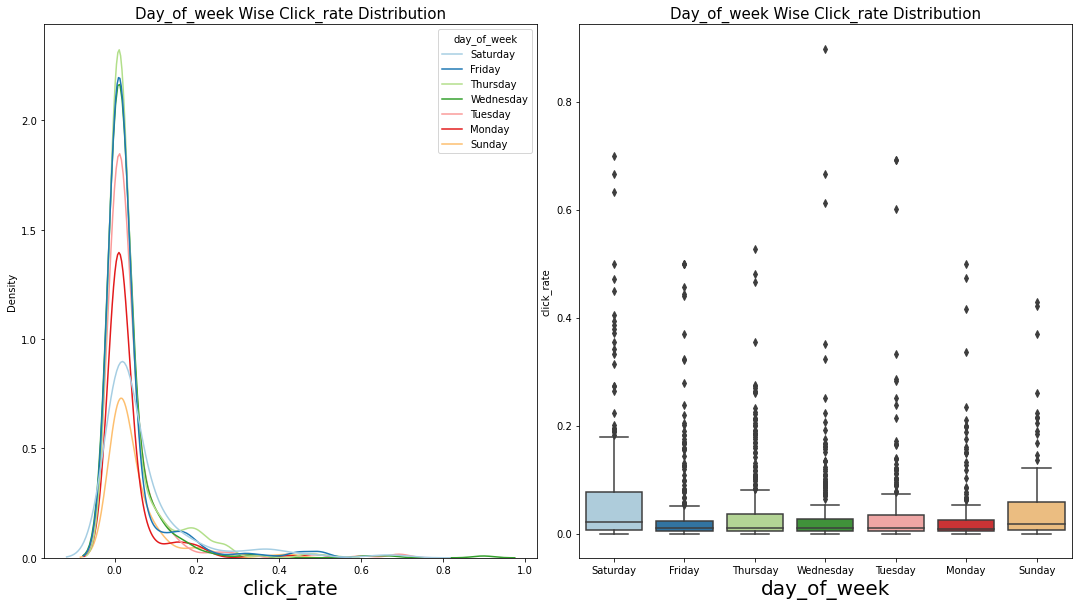

In [ ]:
side_by_side_plot(train,'day_of_week','click_rate')

In [ ]:
group_summary(train,'day_of_week','click_rate')

day_of_week  count      mean       std  min       25%       50%       75%  \
2    Saturday  237.0  0.068755  0.116418  0.0  0.007479  0.020665  0.076923   
3      Sunday  140.0  0.048217  0.074792  0.0  0.007458  0.018104  0.057791   
4    Thursday  346.0  0.041123  0.073969  0.0  0.005207  0.009897  0.035536   
0      Friday  329.0  0.037786  0.080343  0.0  0.005219  0.010077  0.023917   
5     Tuesday  295.0  0.036857  0.080144  0.0  0.005267  0.010261  0.033546   
1      Monday  208.0  0.034590  0.071978  0.0  0.004619  0.009232  0.024778   
6   Wednesday  333.0  0.033967  0.081805  0.0  0.005182  0.009456  0.026493   

        max  
2  0.700000  
3  0.428571  
4  0.526316  
0  0.500000  
5  0.692521  
1  0.500000  
6  0.897959

#### The above chart and summary explain that the highest click rate was recorded for the email campaigning on Wednesday and Saturday.

#### There are outliers in the all-day week click rate.

### Let's compare various email senders and different days of the week.

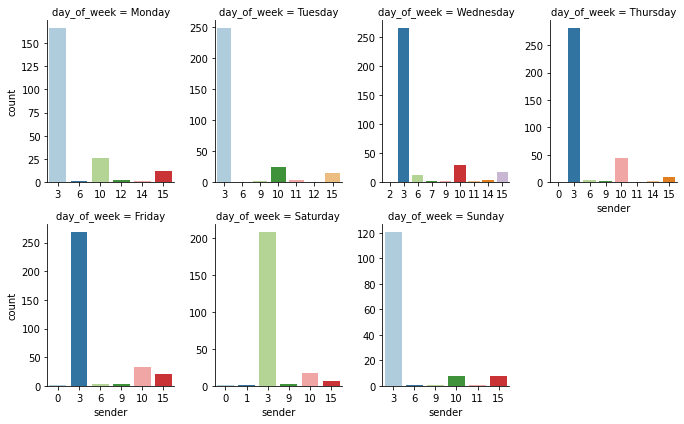

In [ ]:
sns.catplot(data=train.groupby(['sender','day_of_week'])['day_of_week'].agg({'count'}).reset_index(),
            x='sender',y='count',col='day_of_week',
            col_wrap=4,height=3, aspect=.8,
            col_order=list(days.values()),
            sharex=False,sharey=False,kind='bar',palette='Paired');

In [ ]:
train.groupby(['sender','day_of_week'])['sender'].agg({'count'}).reset_index().groupby(['day_of_week'])['sender'].agg({'count'})

count
day_of_week       
Friday           6
Monday           6
Saturday         6
Sunday           6
Thursday         8
Tuesday          7
Wednesday        9

#### The above plot and summary explain that more number of email campaigning senders are active from Tuesday to Thursday.

### Let's see whether the click rate will change on weekend.

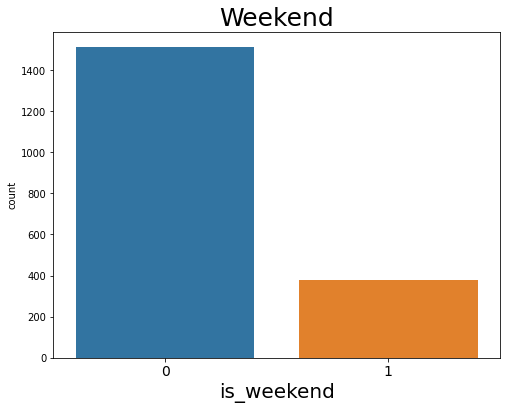

In [ ]:
count_plot(train,'is_weekend' ,title='Weekend')

In [ ]:
train['is_weekend'].value_counts()

0    1511
1     377
Name: is_weekend, dtype: int64

#### The above plot and summary explain that the more number of email campaigning on weekdays.

### Let's see the click rate distribution on weekend.

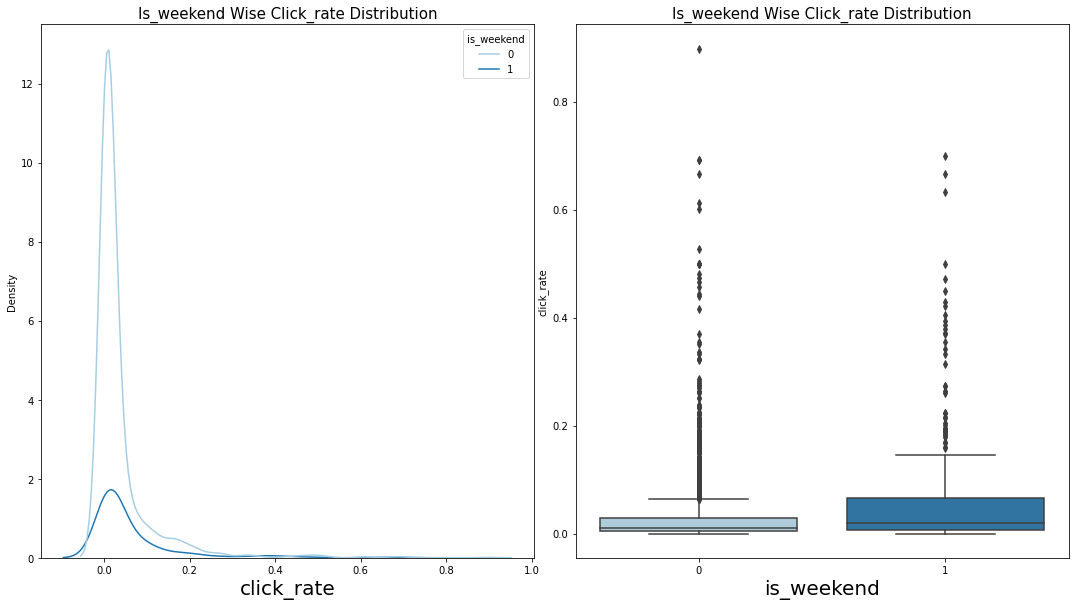

In [ ]:
side_by_side_plot(train,'is_weekend','click_rate')

In [ ]:
group_summary(train,'is_weekend','click_rate')

is_weekend   count      mean       std  min       25%       50%       75%  \
1           1   377.0  0.061128  0.103312  0.0  0.007462  0.019711  0.066492   
0           0  1511.0  0.037087  0.078047  0.0  0.005092  0.009847  0.028552   

        max  
1  0.700000  
0  0.897959

#### The above chart and summary explain that the highest click rate was recorded for the email campaigning on Wednesday and Saturday.

#### There are outliers.

### Let's compare various email senders and different days of the week.

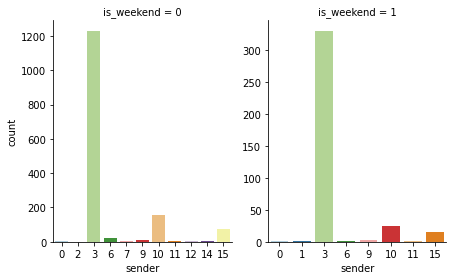

In [ ]:
sns.catplot(data=train.groupby(['sender','is_weekend'])['is_weekend'].agg({'count'}).reset_index(),
            x='sender',y='count',col='is_weekend',
           height=4, aspect=.8,
            sharex=False,sharey=False,kind='bar',palette='Paired');

In [ ]:
train.groupby(['sender','is_weekend'])['sender'].agg({'count'}).reset_index().groupby(['is_weekend'])['sender'].agg({'count'})

count
is_weekend       
0              11
1               8

#### The above plot and summary explain that more number of email campaigning senders are active on weekdays.

### Let's see if there is any relationship between the time of the day the email was sent and the click rate.

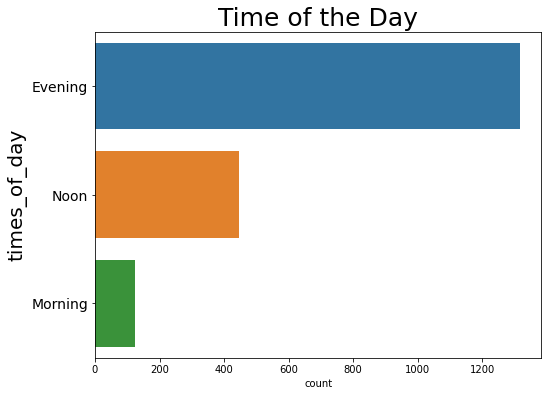

In [ ]:
count_plot(train,'times_of_day' ,title='Time of the Day',switchax=True)

In [ ]:
train['times_of_day'].value_counts()

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64

#### The above plot and summary explain that the more number of email campaigning in the evening.

### Let's see the click rate distribution at different times of the day and different days of the week.

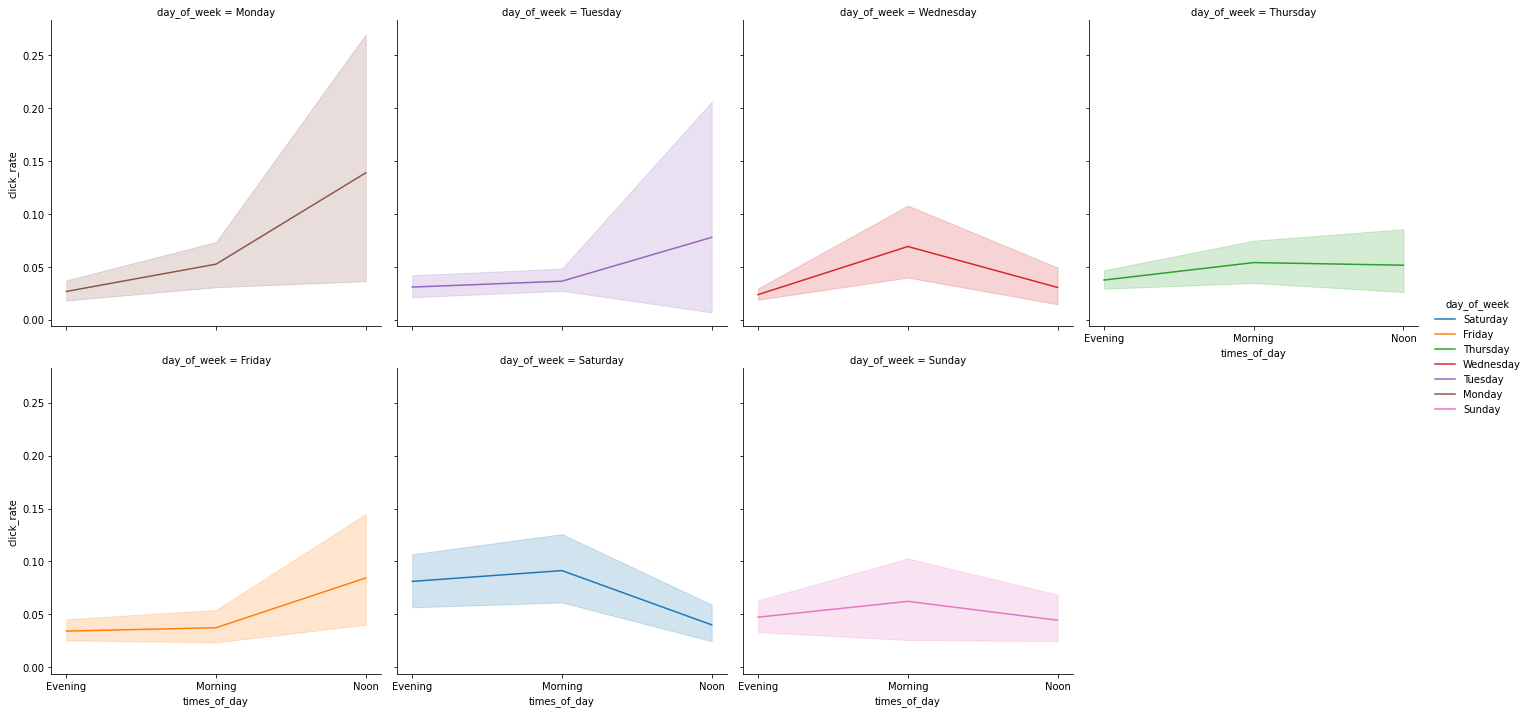

In [ ]:
sns.relplot(data=train,x='times_of_day',y='click_rate',sort=True,
             hue='day_of_week',col='day_of_week',col_wrap=4,
            col_order=list(days.values()),
             kind="line",
);             

#### The above line plot explains that the email campaigning click rate is high in the morning and evening on the weekend and on Monday, Tuesday, and Friday highest click rate is at noon. Morning time on Wednesday and Thursday has a high click rate.

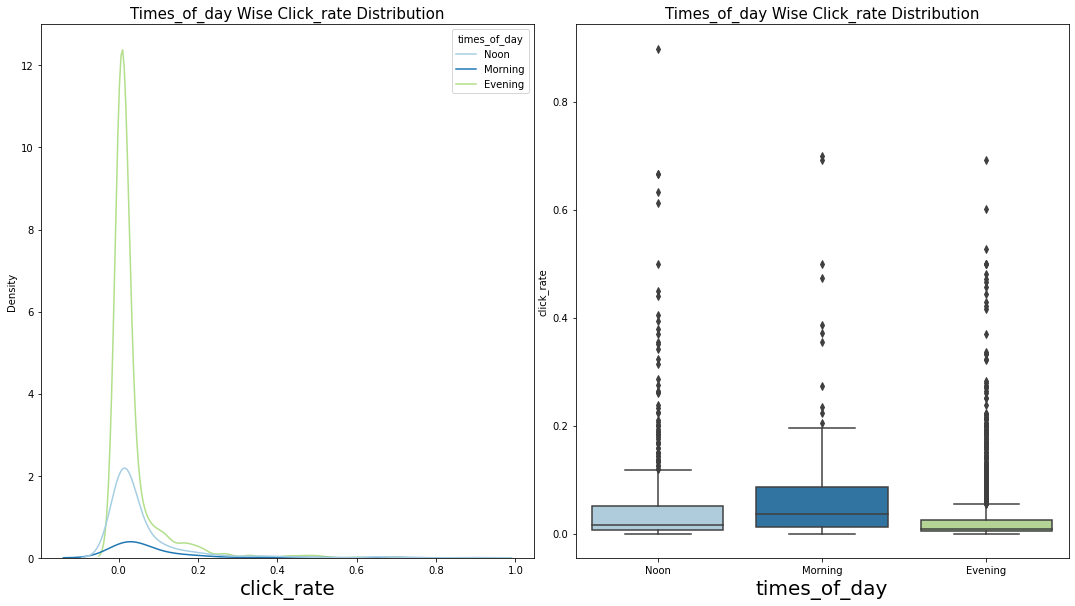

In [ ]:
side_by_side_plot(train,'times_of_day','click_rate')

In [ ]:
group_summary(train,'times_of_day','click_rate')

times_of_day   count      mean       std  min       25%       50%       75%  \
1      Morning   124.0  0.079795  0.121780  0.0  0.012658  0.035812  0.086745   
2         Noon   447.0  0.055602  0.104240  0.0  0.006840  0.015544  0.051532   
0      Evening  1317.0  0.033664  0.069539  0.0  0.004945  0.009149  0.024854   

        max  
1  0.700000  
2  0.897959  
0  0.692308

#### The above chart and summary explain that the highest average click rate was recorded for the email campaigning in the morning.

#### There are outliers above the third quartile at all times of the day.

### Let's compare various email senders and different days of the week.

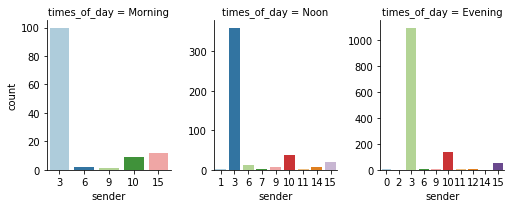

In [ ]:
sns.catplot(data=train.groupby(['sender','times_of_day'])['times_of_day'].agg({'count'}).reset_index(),
            x='sender',y='count',col='times_of_day',
            col_wrap=3,height=3, aspect=.8,
            col_order=['Morning','Noon','Evening'],
            sharex=False,sharey=False,kind='bar',palette='Paired');

In [ ]:
train.groupby(['sender','times_of_day'])['sender'].agg({'count'}).reset_index().groupby(['times_of_day'])['sender'].agg({'count'})

count
times_of_day       
Evening          10
Morning           5
Noon              9

#### The above plot and summary explain that more number of email campaigning senders are active in the evening.

### Let's see what are the product categories in the email campaigning.

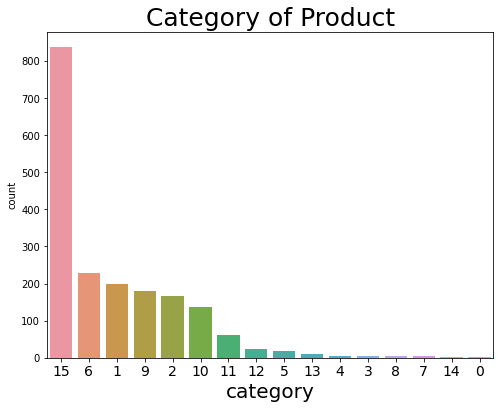

In [ ]:
count_plot(train,'category' ,title='Category of Product')

In [ ]:
train['category'].value_counts()

15    837
6     229
1     200
9     179
2     166
10    137
11     61
12     24
5      19
13     11
4       6
3       6
8       6
7       4
14      2
0       1
Name: category, dtype: int64

#### The above plot and summary explain that the more number of email campaigning for the product category 15.

### Let's see the click rate distribution of different product categories at different days of the week.

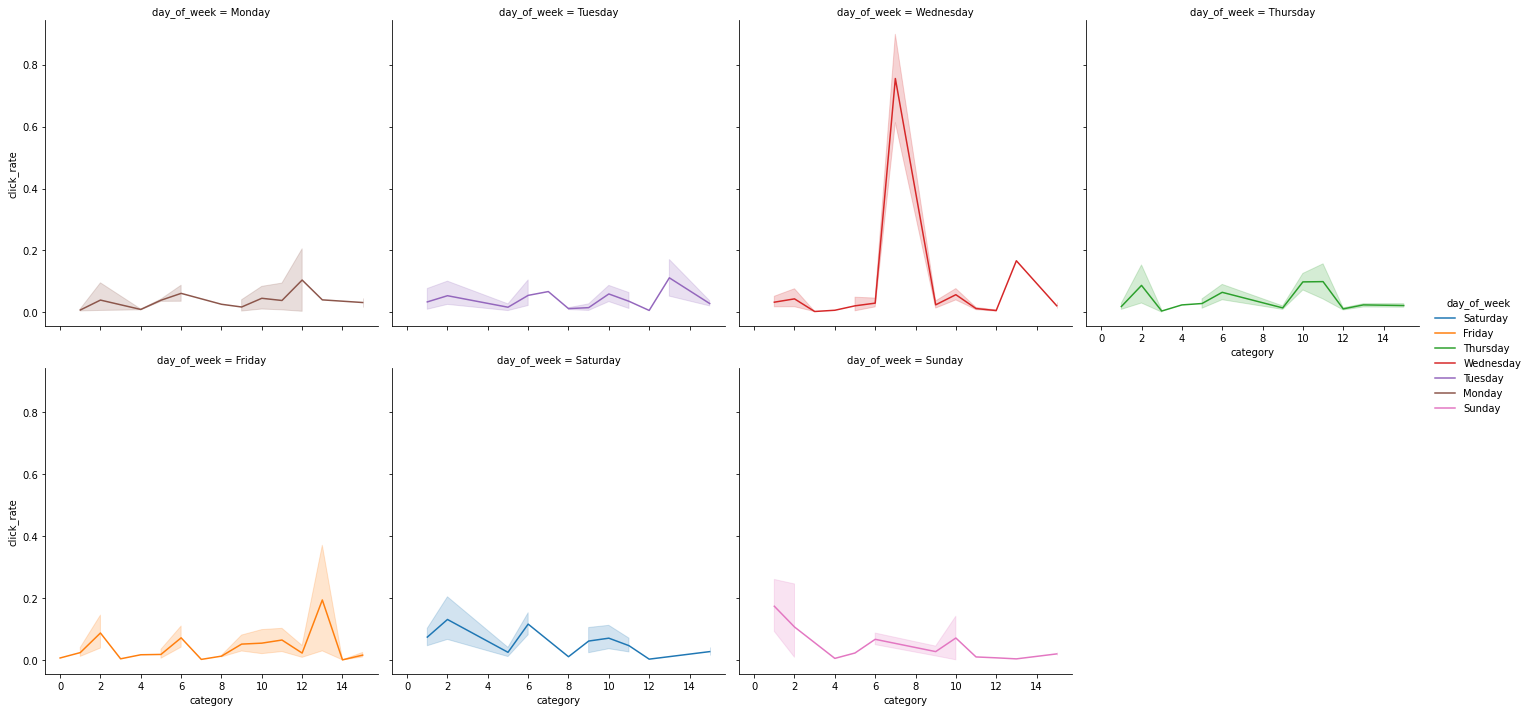

In [ ]:
sns.relplot(data=train,x='category',y='click_rate',sort=True,
             hue='day_of_week',col='day_of_week',
          col_wrap=4,col_order=list(days.values()),
            kind="line",
);

#### The above plot explains that on Monday the click rate is high for product 12. For Tuesday and Friday product 13's click rate is high. The click rate is high for product 7 on Wednesday. Products 10, and 11 have the highest click rate on Thursday. On weekends product 1 has a high click rate.

### Let's see the click rate distribution of different product categories at different times of the day.

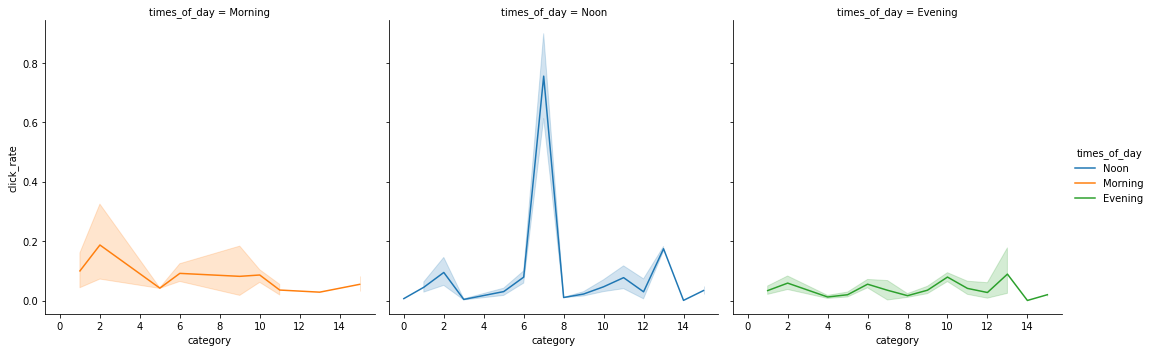

In [ ]:
sns.relplot(data=train,x='category',y='click_rate',sort=True,
             hue='times_of_day',col='times_of_day',
          col_wrap=3,col_order=['Morning','Noon','Evening'],
            kind="line",
);

#### The above plot explains that in the morning time, product 2 has a click rate and in the noon time product 7 has a high click rate and product 13 has a high click rate in the evening.

### Click rate distribution of different product category.

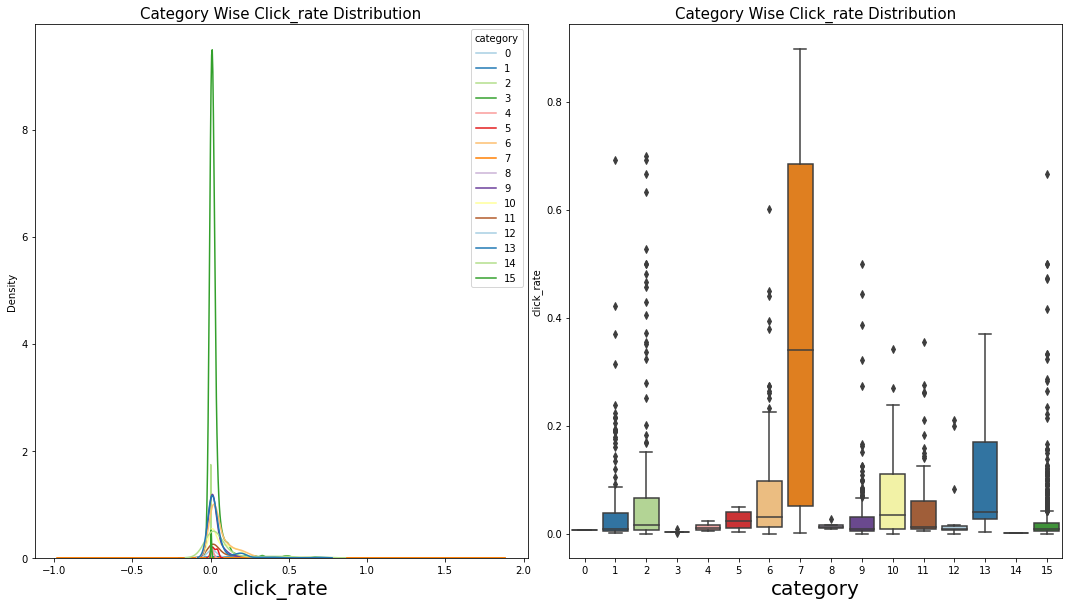

In [ ]:
side_by_side_plot(train,'category','click_rate')

In [ ]:
group_summary(train,'category','click_rate')

category  count      mean       std       min       25%       50%  \
7          7    4.0  0.394864  0.432933  0.001846  0.050849  0.339825   
13        13   11.0  0.098877  0.112538  0.003551  0.027517  0.040368   
2          2  166.0  0.079360  0.149368  0.000000  0.005846  0.015736   
10        10  137.0  0.068959  0.072758  0.000000  0.007577  0.034084   
6          6  229.0  0.067375  0.088228  0.000000  0.012227  0.030342   
11        11   61.0  0.055749  0.080268  0.003944  0.007920  0.012344   
1          1  200.0  0.039403  0.080779  0.001152  0.004583  0.009235   
9          9  179.0  0.033790  0.069265  0.000000  0.005386  0.009328   
12        12   24.0  0.027884  0.056885  0.000000  0.006548  0.008422   
5          5   19.0  0.024078  0.016061  0.002605  0.010176  0.022534   
15        15  837.0  0.023565  0.055181  0.000000  0.004747  0.008495   
8          8    6.0  0.014272  0.006352  0.009179  0.010013  0.012697   
4          4    6.0  0.011947  0.007202  0.005089  0.007166  0.009445   
0          0    1.0  0.006441       NaN  0.006441  0.006441  0.006441   
3          3    6.0  0.003699  0.002566  0.000915  0.002715  0.003202   
14        14    2.0  0.000362  0.000200  0.000221  0.000291  0.000362   

         75%       max  
7   0.683839  0.897959  
13  0.168699  0.370321  
2   0.065991  0.700000  
10  0.109495  0.342105  
6   0.098198  0.600683  
11  0.059574  0.354545  
1   0.037703  0.692308  
9   0.029961  0.500000  
12  0.013838  0.210526  
5   0.040820  0.048991  
15  0.019475  0.666667  
8   0.015018  0.026149  
4   0.015294  0.024053  
0   0.006441  0.006441  
3   0.003636  0.008540  
14  0.000433  0.000504

#### The above chart and summary explain that the highest average click rate was recorded for product 3.

#### The average click rate for the most campaigned product 15 is 0.023.

### Let's compare various email senders and different product category.

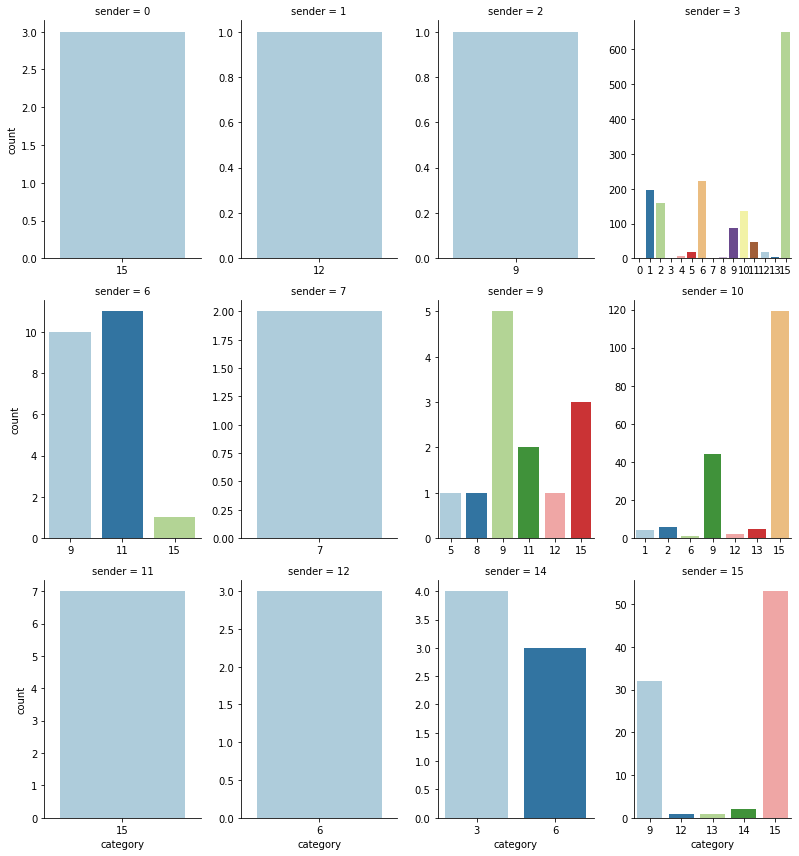

In [ ]:
sns.catplot(data=train.groupby(['category','sender'])['sender'].agg({'count'}).reset_index(),
            x='category',y='count',col='sender',
            col_wrap=4,height=4, aspect=.7,
            #col_order=['Morning','Noon','Evening'],
            sharex=False,sharey=False,kind='bar',palette='Paired');

In [ ]:
train.groupby(['sender','category'])['sender'].agg({'count'}).reset_index().groupby(['category'])['sender'].agg({'count'}).reset_index().sort_values('count',ascending=False)

category  count
15        15      7
9          9      6
12        12      5
6          6      4
11        11      3
13        13      3
1          1      2
2          2      2
3          3      2
5          5      2
7          7      2
8          8      2
0          0      1
4          4      1
10        10      1
14        14      1

#### The above plot and summary explain that more number product campaigns by the sender category 3, 9, 10, and 15.

### Let's see what are the types of products in the email campaigning.

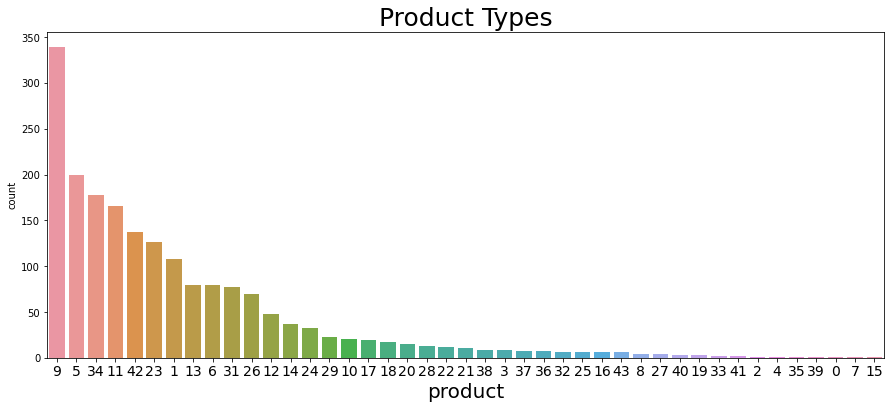

In [ ]:
count_plot(train,'product' ,title='Product Types',size=(15,6))

In [ ]:
train['product'].value_counts()

9     339
5     200
34    178
11    166
42    137
23    126
1     108
13     79
6      79
31     77
26     70
12     48
14     37
24     33
29     23
10     21
17     19
18     17
20     15
28     13
22     12
21     11
38      9
3       8
37      7
36      7
32      6
25      6
16      6
43      6
8       4
27      4
40      3
19      3
33      2
41      2
2       1
4       1
35      1
39      1
0       1
7       1
15      1
Name: product, dtype: int64

### Let's see number of call to action(CTA) in the email.

In [ ]:
train['no_of_CTA'].nunique()

40

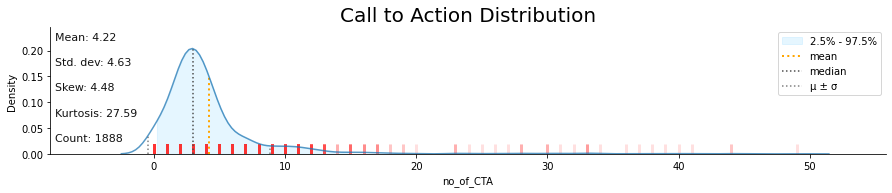

In [ ]:
klib.dist_plot(train['no_of_CTA']);
plt.title("Call to Action Distribution",fontsize=20);

In [ ]:
train['no_of_CTA'].describe()

count    1888.000000
mean        4.222458
std         4.628348
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        49.000000
Name: no_of_CTA, dtype: float64

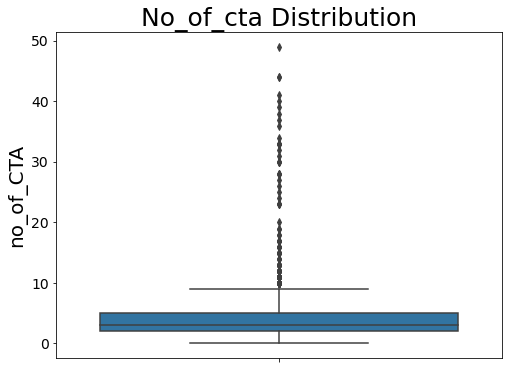

In [ ]:
box_plot(train,'no_of_CTA',rot=90)

#### The above histogram explains that the number of cals to action column is positively skewed(mean>median).

#### The number of calls to action in the email ranges from 0 to 49.

#### The average number of call to action in the email is 4.2.

#### The boxplot explains that there are outliers above the third quartile.

### Let's see if is there any relationship between the number of calls to action in the email and click rate by different sender categories.

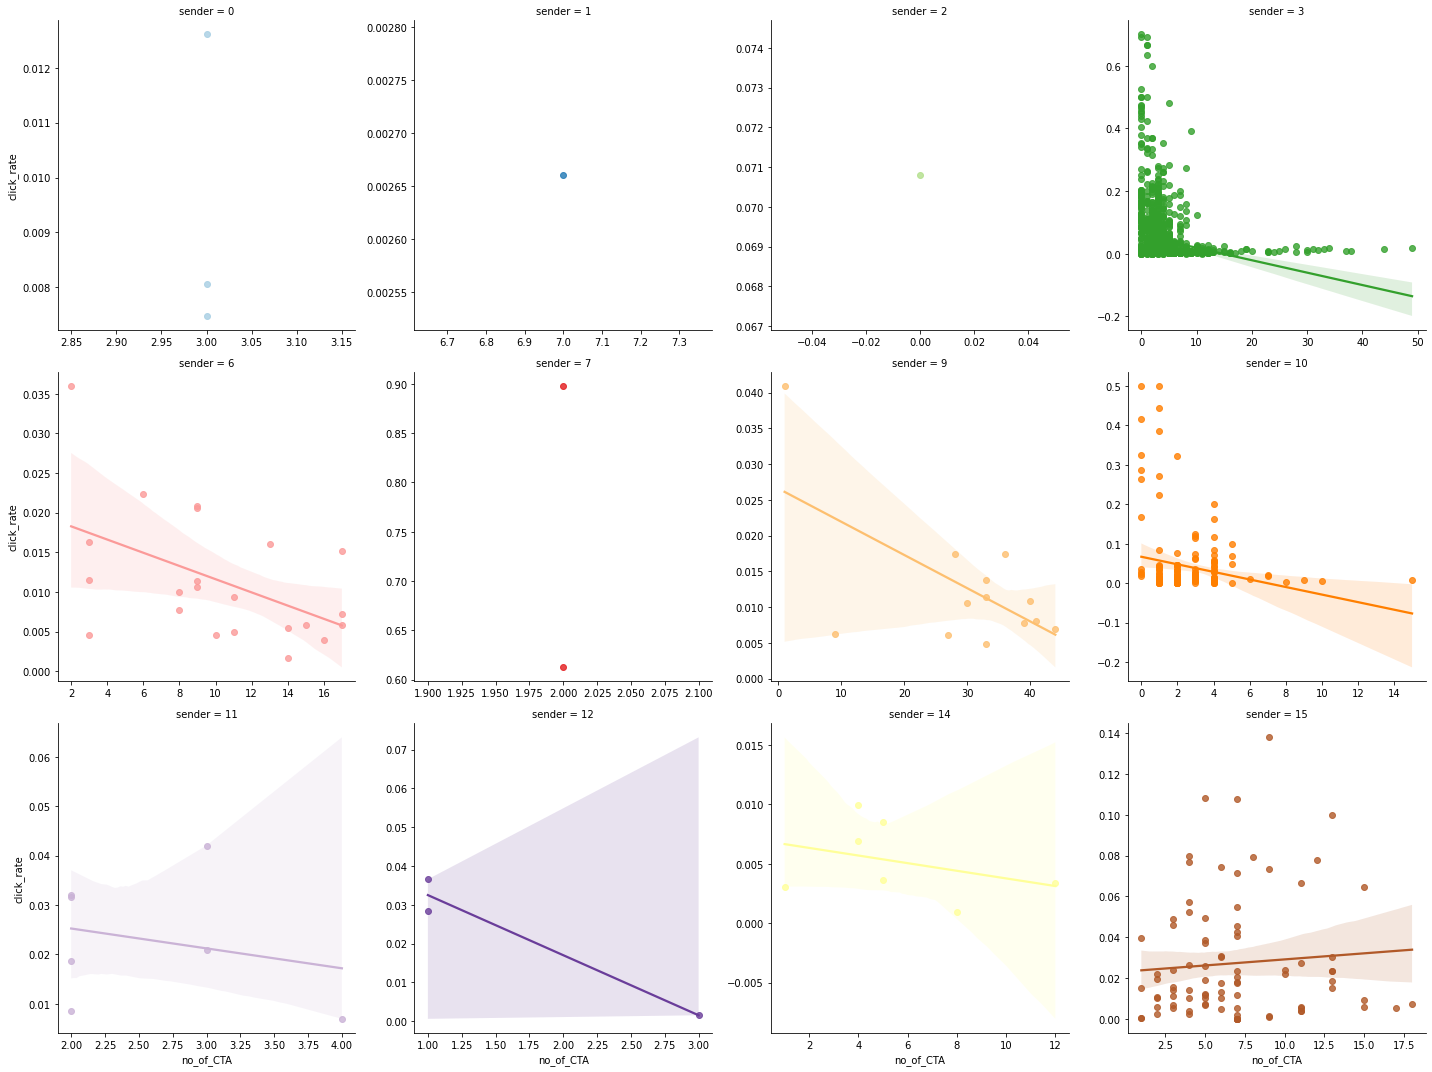

In [ ]:
sns.lmplot(data=train, x="no_of_CTA", y="click_rate",hue='sender',
           col='sender',col_wrap=4,sharex=False,sharey=False,palette='Paired');


#### The number of calls to action in the email and click rate have a negative relationship(if the number of calls to action in the email increases the click rate score will decrease) in most sender categories except the 15.


### Let's see if is there any relationship between the number of calls to action in the email and click rate on different days of the week.

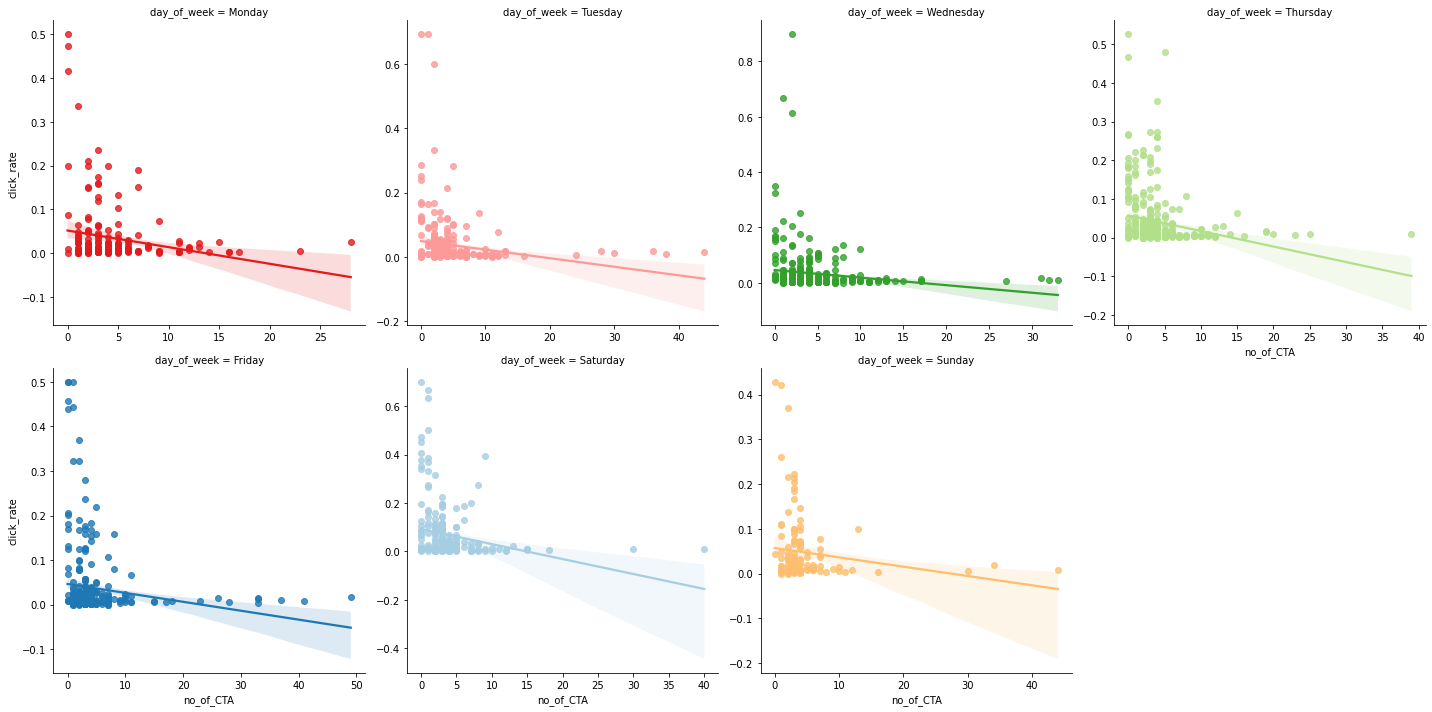

In [ ]:
sns.lmplot(data=train, x="no_of_CTA", y="click_rate",hue='day_of_week',
           col='day_of_week',col_wrap=4,sharex=False,sharey=False,palette='Paired',
           col_order=list(days.values()));


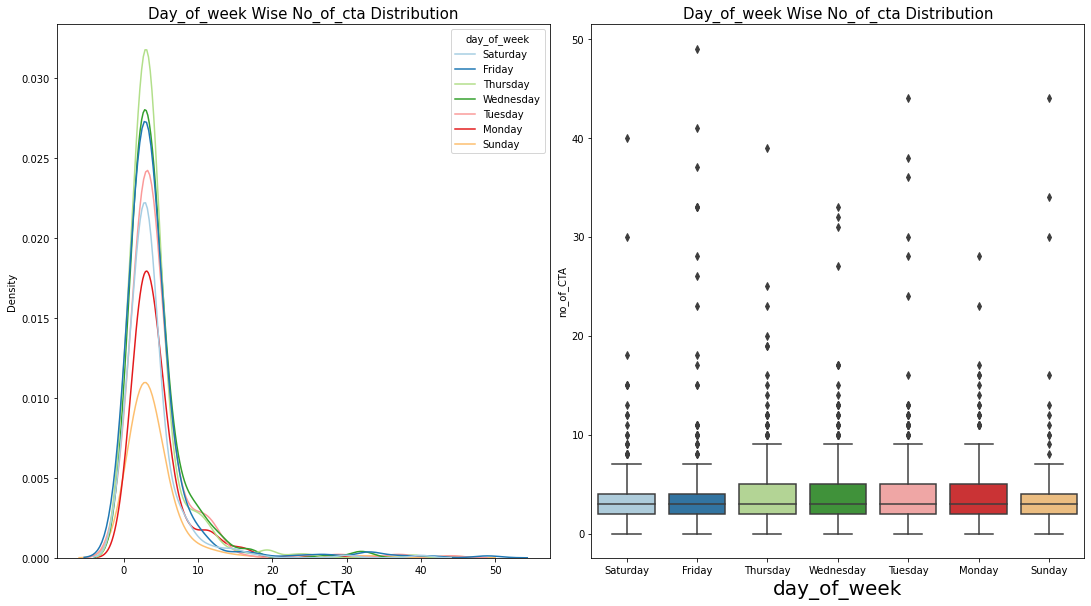

In [ ]:
side_by_side_plot(train,'day_of_week','no_of_CTA')

#### The number of calls to action in the email and click rate have a negative relationship(if the number of calls to action in the email increases the click rate score will decrease) on all days of the week.


### Let's see if is there any relationship between the number of calls to action in the email and click rate at different times of the day.

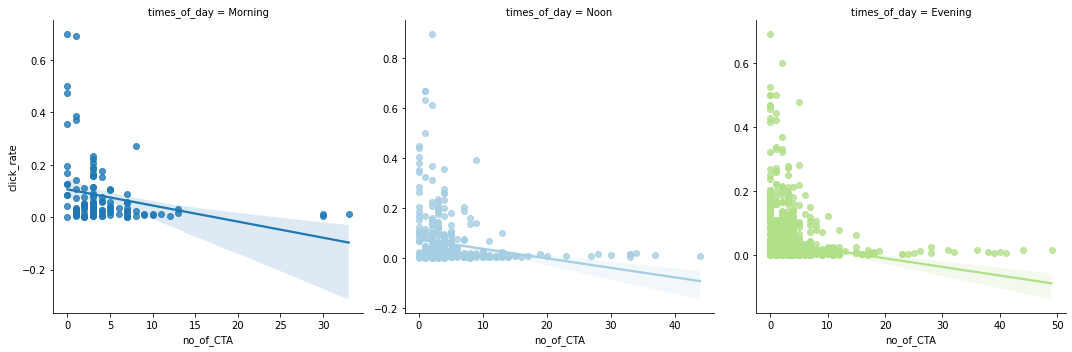

In [ ]:
sns.lmplot(data=train, x="no_of_CTA", y="click_rate",hue='times_of_day',
           col='times_of_day',col_wrap=3,sharex=False,sharey=False,palette='Paired',
           col_order=['Morning','Noon','Evening']);


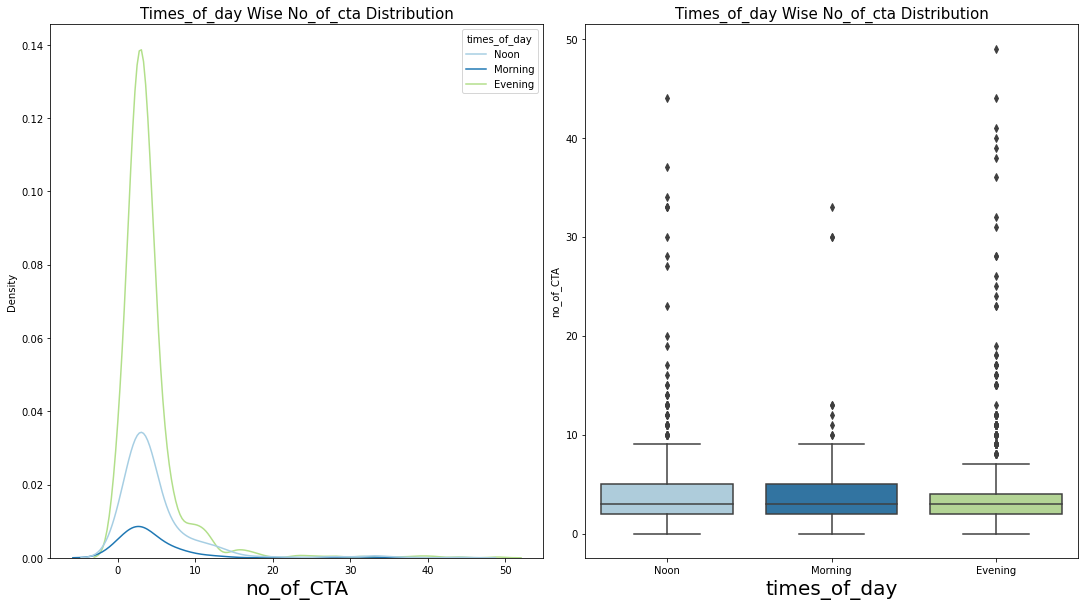

In [ ]:
side_by_side_plot(train,'times_of_day','no_of_CTA')

#### The number of calls to action in the email and click rate have a negative relationship(if the number of calls to action in the email increases the click rate score will decrease) at all times of the day.


### Let's see if is there any relationship between the number of calls to action in the email and click rate by different product types.

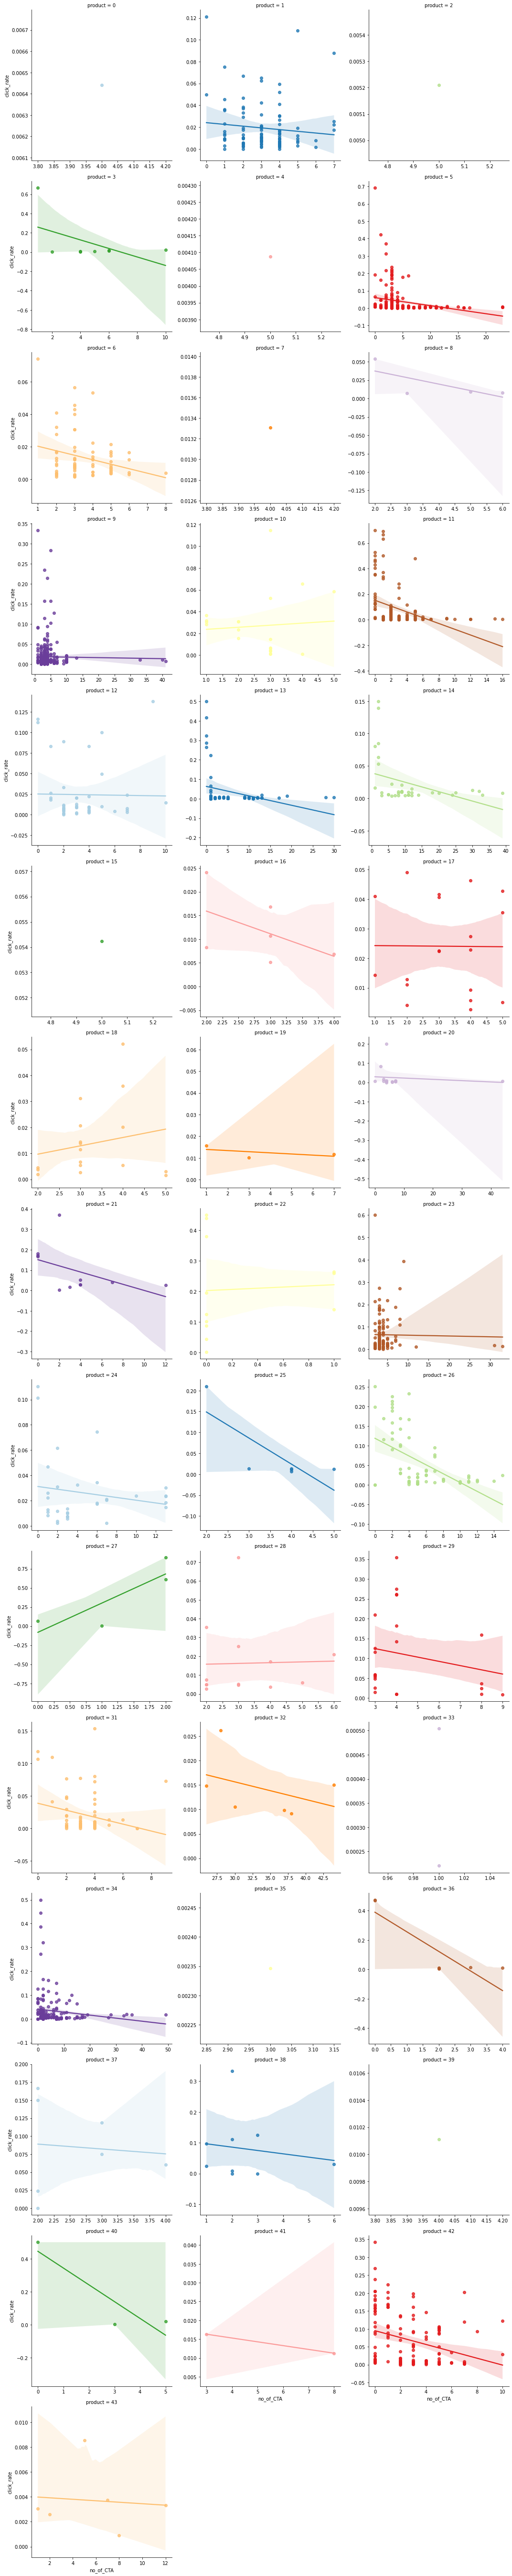

In [ ]:
sns.lmplot(data=train, x="no_of_CTA", y="click_rate",hue='product',
           col='product',col_wrap=3,sharex=False,sharey=False,palette='Paired',
          );


#### The above explains the relationship between the number of calls to action for different types of products in the email and the click rate.

### Let's see the average number of characters in call to action(CTA) of the email.

In [ ]:
train['mean_CTA_len'].nunique()

79

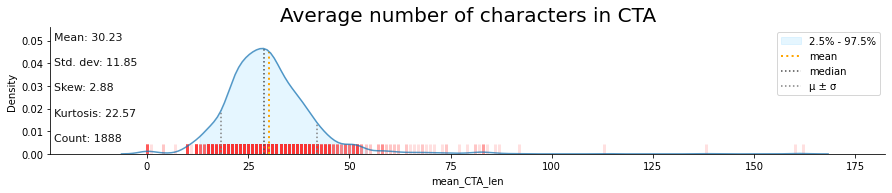

In [ ]:
klib.dist_plot(train['mean_CTA_len']);
plt.title("Average number of characters in CTA",fontsize=20);

In [ ]:
train['mean_CTA_len'].describe()

count    1888.000000
mean       30.233051
std        11.848663
min         0.000000
25%        23.000000
50%        29.000000
75%        35.000000
max       162.000000
Name: mean_CTA_len, dtype: float64

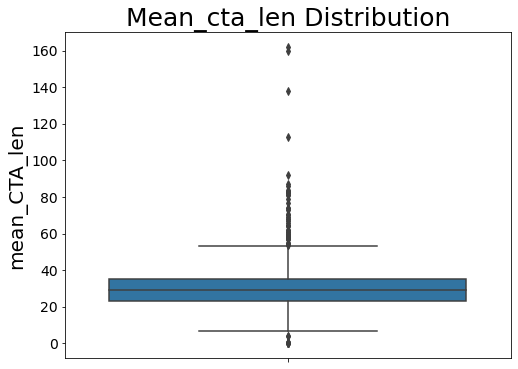

In [ ]:
box_plot(train,'mean_CTA_len',rot=90)

#### The above histogram explains that the mean_CTA_len column is normally distributed.

#### The average number of characters in call to action(CTA) of the email ranges from 0 to 162.

#### The average of average number of characters in call to action(CTA) of the email is 30.23.

#### The boxplot explains that there are outliers above the third quartile and below the first quartile.

### Let's see if is there any relationship between the number of characters in CTA and the number of calls to action in the mail.

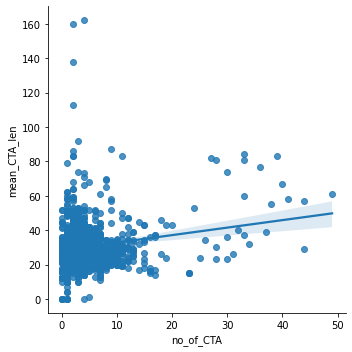

In [ ]:
sns.lmplot(data=train, x="no_of_CTA", y="mean_CTA_len",palette='Paired');


#### The number of calls to action in the email and the number of characters in the CTA have a positive relationship(if the number of calls to action in the email increases the number of characters in CTA will increase).

### Let's see if is there any relationship between the number of characters in CTA and the click rate by different sender categories.

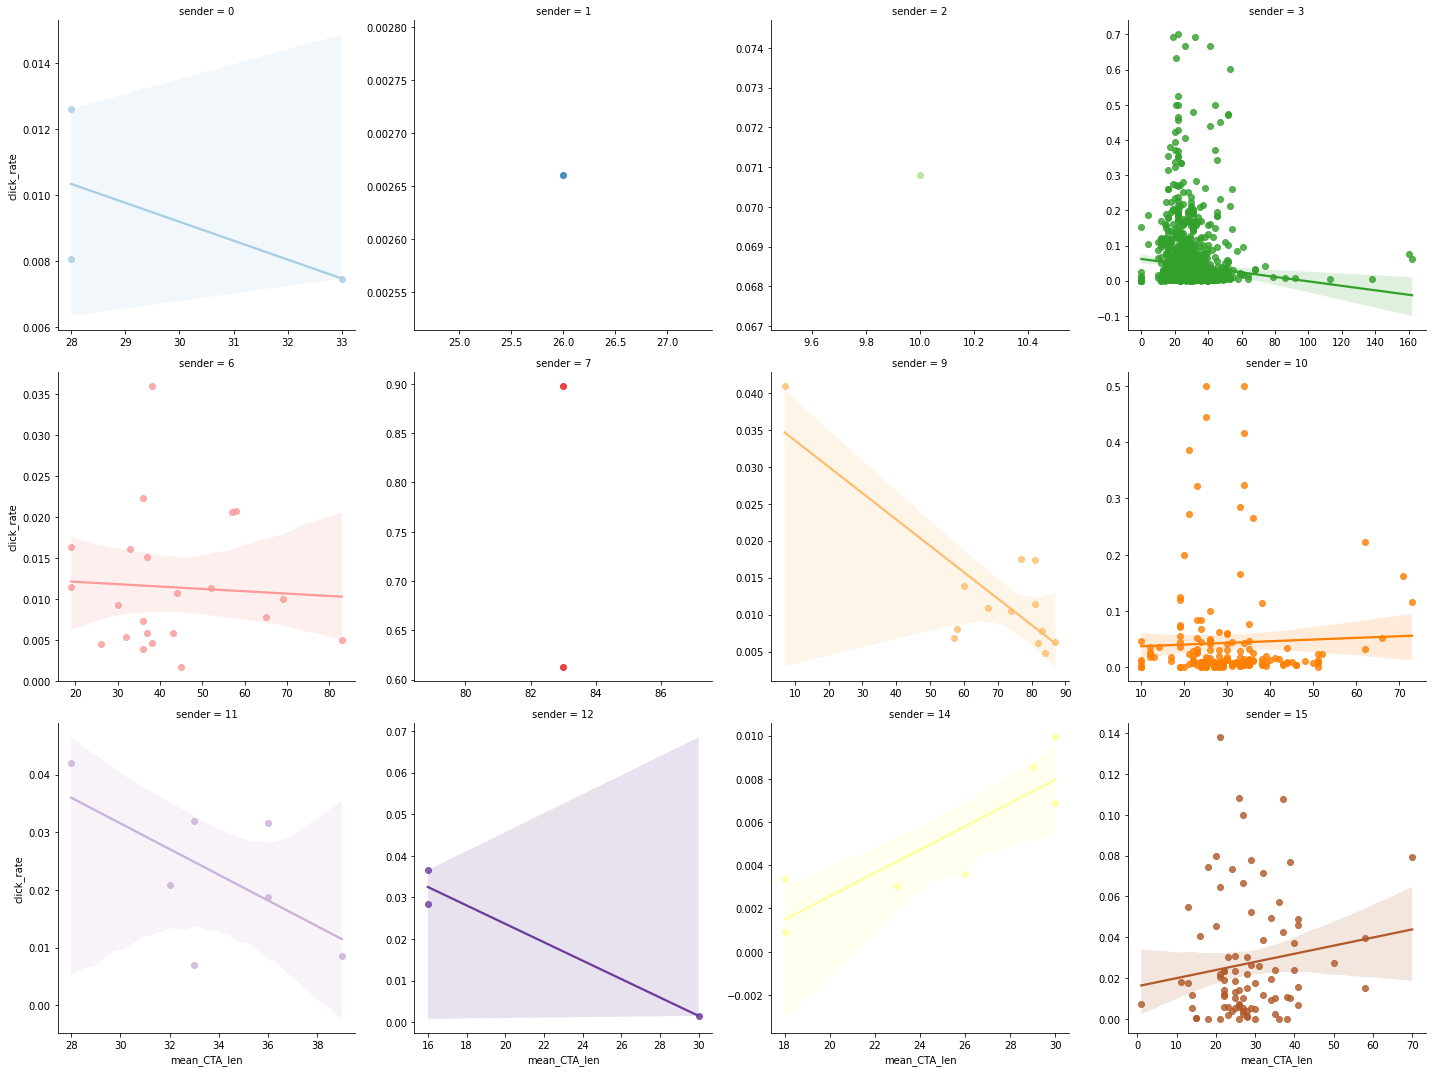

In [ ]:
sns.lmplot(data=train, x="mean_CTA_len", y="click_rate",hue='sender',
           col='sender',col_wrap=4,sharex=False,sharey=False,palette='Paired',
          );

#### The number of calls to action in the email and the click rate has a negative relationship(if the number of the average character increases the click click rate will decrease).

### Let's see if is there any relationship between the number of characters in CTA and the click rate on different days of the week.

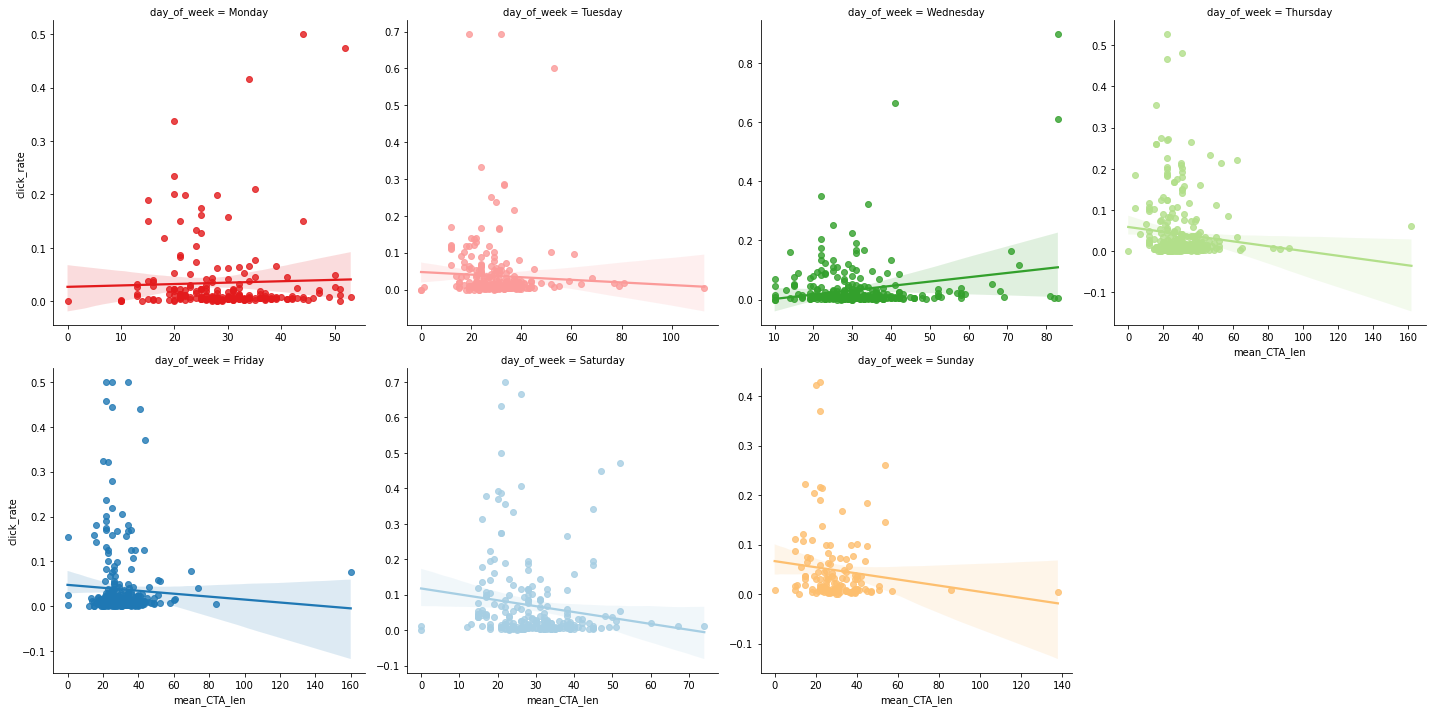

In [ ]:
sns.lmplot(data=train, x="mean_CTA_len", y="click_rate",hue='day_of_week',
           col='day_of_week',col_wrap=4,sharex=False,sharey=False,palette='Paired',
           col_order=list(days.values()));


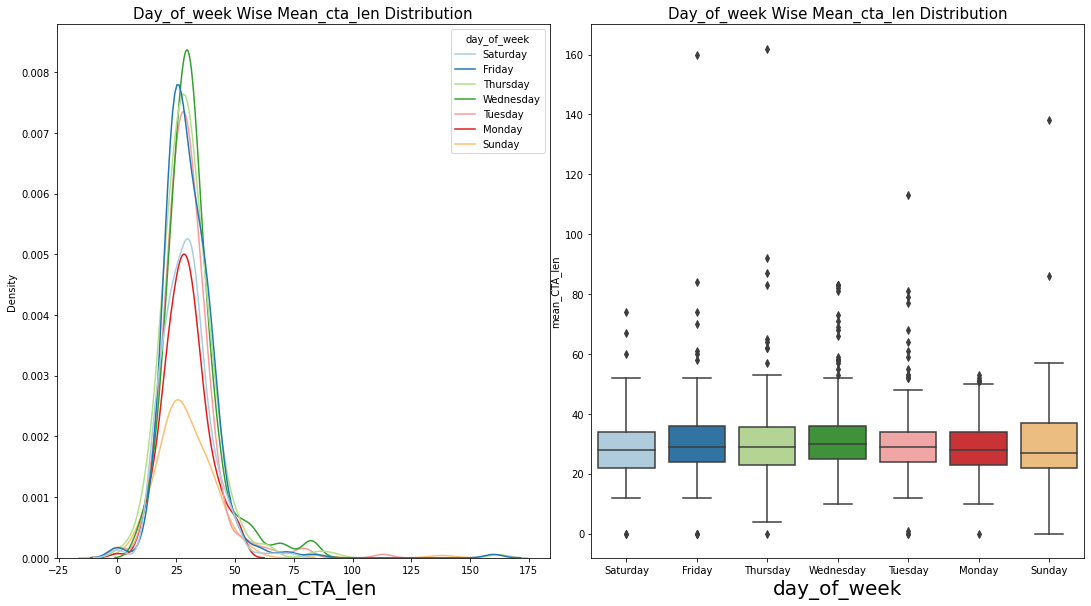

In [ ]:
side_by_side_plot(train,'day_of_week','mean_CTA_len')

#### The average number of characters in the CTA and click rate have a negative relationship(if the average number of characters in the CTA increases the click rate score will decrease) on all days of the week except Monday and Wednesday.


### Let's see if is there any relationship between the average number of characters in the CTA and click rate at different times of the day.

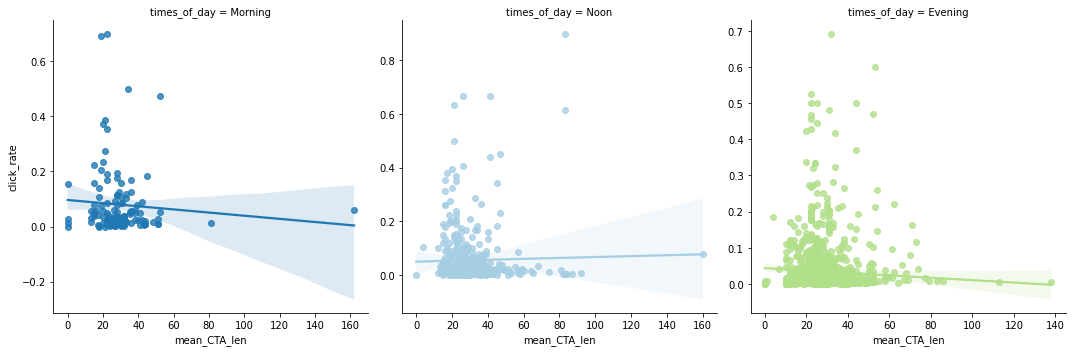

In [ ]:
sns.lmplot(data=train, x="mean_CTA_len", y="click_rate",hue='times_of_day',
           col='times_of_day',col_wrap=3,sharex=False,sharey=False,palette='Paired',
           col_order=['Morning','Noon','Evening']);


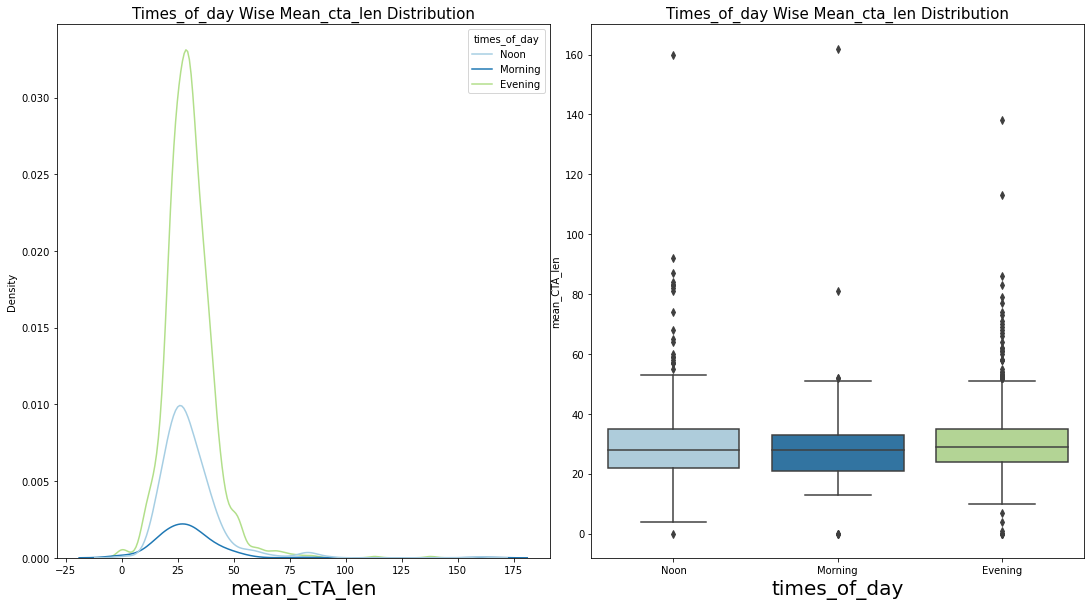

In [ ]:
side_by_side_plot(train,'times_of_day','mean_CTA_len')

#### The average number of characters in the CTA and click rate have a negative relationship(if the average number of characters in the CTA increases the click rate score will decrease) at all times of the day except noon.


### Let's see if is there any relationship between the average number of characters in the CTA and click rate by different product types.

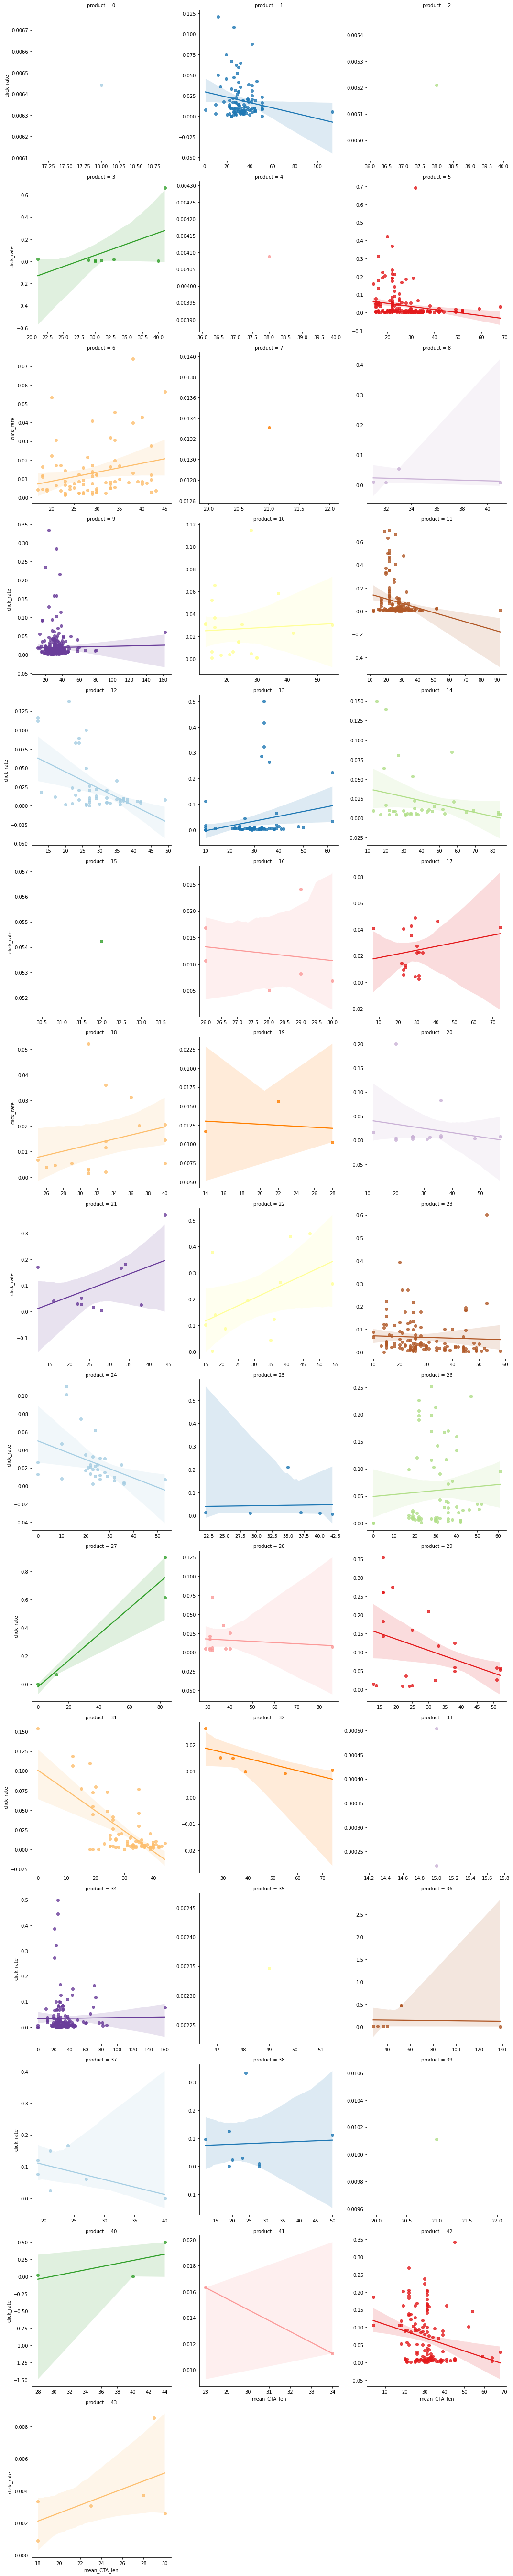

In [ ]:
sns.lmplot(data=train, x="mean_CTA_len", y="click_rate",hue='product',
           col='product',col_wrap=3,sharex=False,sharey=False,palette='Paired',
          );


#### The above explains the relationship between the average number of characters in the CTA for different types of products in the email and the click rate.

### Let's see how many images used in the email campaigning.

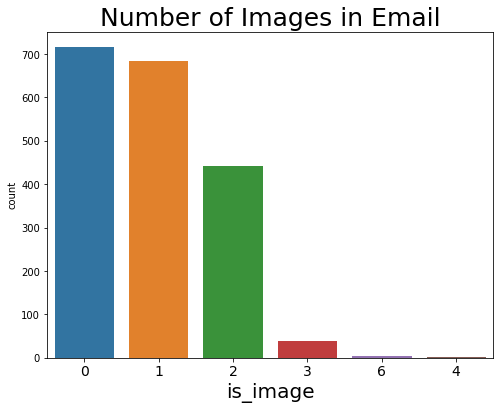

In [ ]:
count_plot(train,'is_image' ,title='Number of Images in Email')

In [ ]:
train['is_image'].value_counts()

0    716
1    685
2    442
3     39
6      4
4      2
Name: is_image, dtype: int64

#### The above plot and summary explain that more number of email campaigning has not used any images and if used there are mostly one or two.

### Click rate distribution of different number of images.

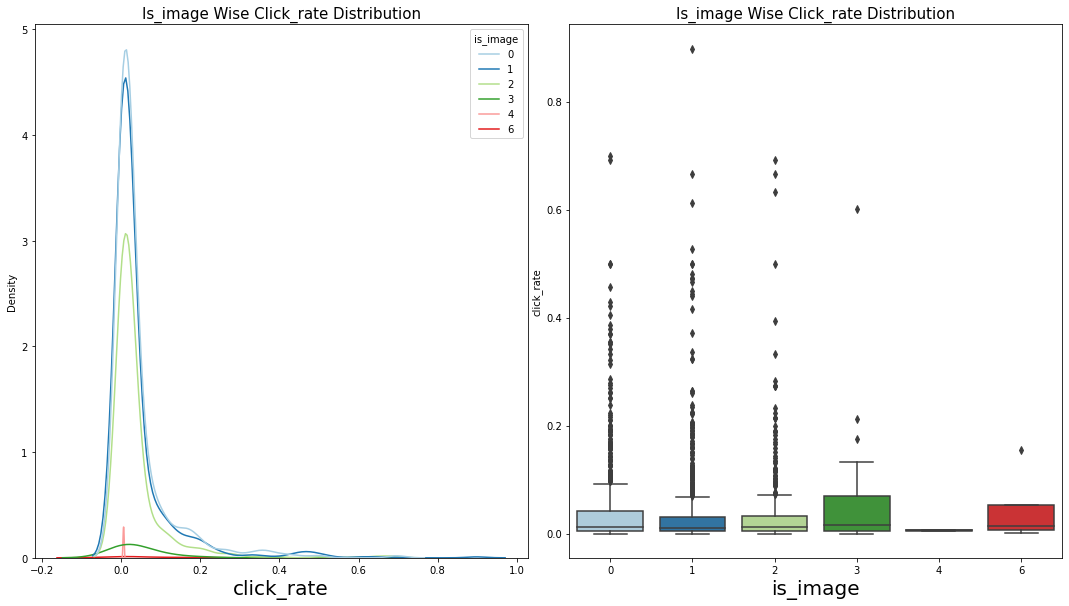

In [ ]:
side_by_side_plot(train,'is_image','click_rate')

In [ ]:
group_summary(train,'is_image','click_rate')

is_image  count      mean       std       min       25%       50%  \
3         3   39.0  0.053530  0.103341  0.000000  0.005046  0.016700   
5         6    4.0  0.046139  0.072219  0.001627  0.006946  0.014542   
0         0  716.0  0.044411  0.082327  0.000000  0.005490  0.011744   
1         1  685.0  0.041492  0.089344  0.000000  0.005329  0.009866   
2         2  442.0  0.037510  0.077324  0.000000  0.005477  0.012017   
4         4    2.0  0.005849  0.001199  0.005001  0.005425  0.005849   

        75%       max  
3  0.069217  0.600683  
5  0.053736  0.153846  
0  0.041926  0.700000  
1  0.030845  0.897959  
2  0.031852  0.692521  
4  0.006273  0.006697

#### The above chart and summary explain that the highest average click rate was recorded if the email used 3 images.

#### The average click rate for non-image emails is 0.044.

### Let's compare various email senders and the number of images used in the mail.

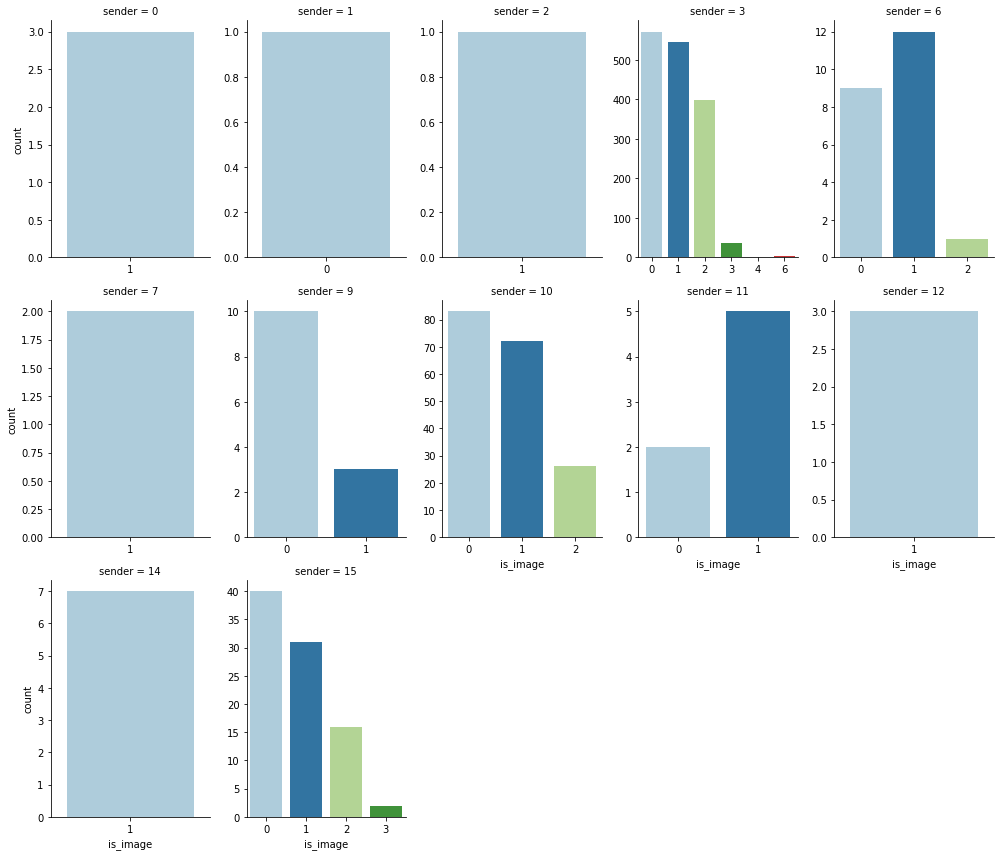

In [ ]:
sns.catplot(data=train.groupby(['is_image','sender'])['sender'].agg({'count'}).reset_index(),
            x='is_image',y='count',col='sender',
            col_wrap=5,height=4, aspect=.7,
            sharex=False,sharey=False,kind='bar',palette='Paired');

In [ ]:
train.groupby(['sender','is_image'])['is_image'].agg({'count'}).reset_index().groupby(['sender'])['is_image'].agg({'count'}).reset_index().sort_values('count',ascending=False)

sender  count
3        3      6
11      15      4
4        6      3
7       10      3
6        9      2
8       11      2
0        0      1
1        1      1
2        2      1
5        7      1
9       12      1
10      14      1

#### The above plot and summary explain that more number of images in the email used by the sender category 3, 10, and 15.

### Let's see how many users have personalized email.

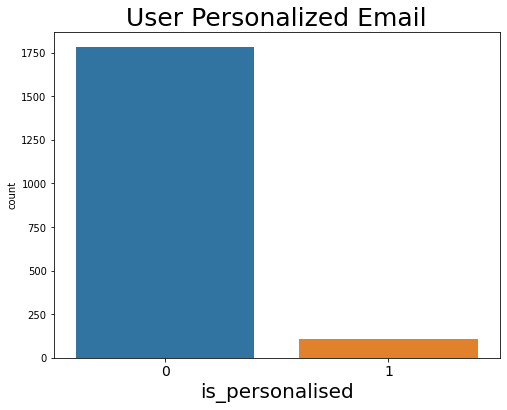

In [ ]:
count_plot(train,'is_personalised' ,title='User Personalized Email')

In [ ]:
train['is_personalised'].value_counts()

0    1781
1     107
Name: is_personalised, dtype: int64

#### The above plot and summary explain that more number of email campaigning has not been personalized to any user.

### Click rate distribution of personalized email.

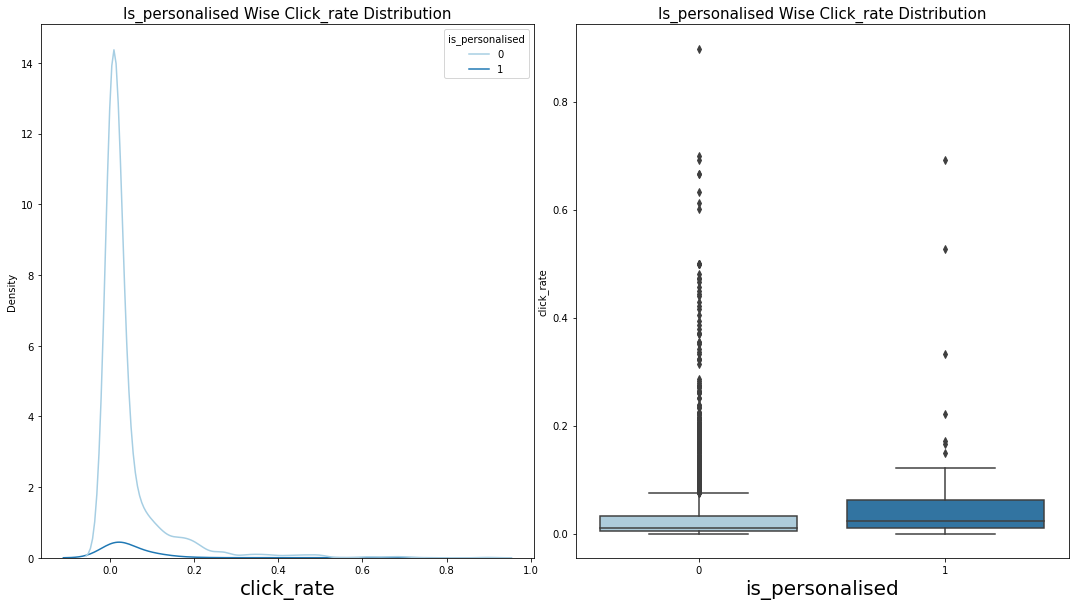

In [ ]:
side_by_side_plot(train,'is_personalised','click_rate')

In [ ]:
group_summary(train,'is_personalised','click_rate')

is_personalised   count      mean       std  min       25%       50%  \
1                1   107.0  0.053197  0.093586  0.0  0.009531  0.023810   
0                0  1781.0  0.041208  0.083607  0.0  0.005329  0.010288   

        75%       max  
1  0.063027  0.692308  
0  0.033384  0.897959

#### The above chart and summary explain that the highest average click rate was recorded if the email is not personalized.

#### The average click rate for non-personalized emails is 0.041.

### Let's see how many quotes used in the email.

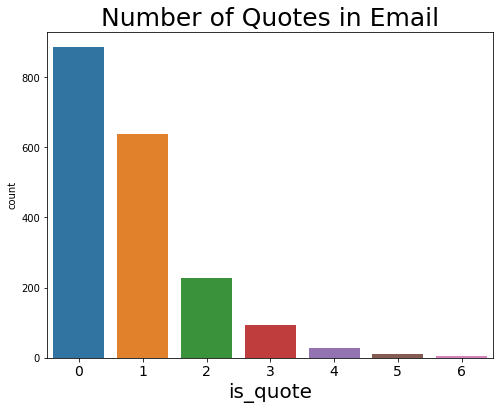

In [ ]:
count_plot(train,'is_quote' ,title='Number of Quotes in Email')

In [ ]:
train['is_quote'].value_counts()

0    885
1    638
2    227
3     93
4     27
5     12
6      6
Name: is_quote, dtype: int64

#### The above plot and summary explain that more number of email campaigning doesn't have any quotes. If the email used quotes then it will be mostly 1 or 2 quotes.

### Click rate distribution of different number of quotes.

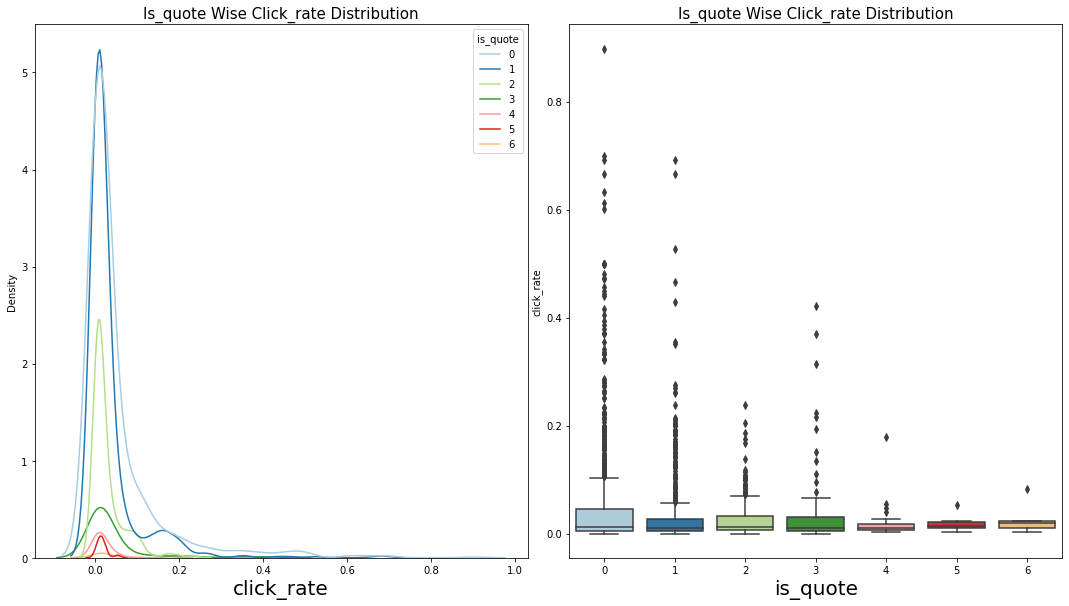

In [ ]:
side_by_side_plot(train,'is_quote','click_rate')

In [ ]:
group_summary(train,'is_quote','click_rate')

is_quote  count      mean       std       min       25%       50%  \
0         0  885.0  0.052058  0.101849  0.000000  0.005594  0.011379   
3         3   93.0  0.038471  0.075003  0.000000  0.005533  0.010439   
1         1  638.0  0.034740  0.070194  0.000000  0.005129  0.009883   
2         2  227.0  0.027959  0.038355  0.000000  0.005882  0.011396   
6         6    6.0  0.026094  0.029272  0.003239  0.009398  0.020324   
4         4   27.0  0.020871  0.034313  0.001999  0.006411  0.011015   
5         5   12.0  0.016996  0.013071  0.002427  0.009585  0.013281   

        75%       max  
0  0.045455  0.897959  
3  0.030633  0.422222  
1  0.026098  0.692521  
2  0.031756  0.237288  
6  0.022772  0.083333  
4  0.018198  0.178571  
5  0.020733  0.053412

#### The above chart and summary explain that the highest average click rate was recorded if the email hasn't used any quotes.

### Let's compare various email senders and the number of quotes used in the mail.

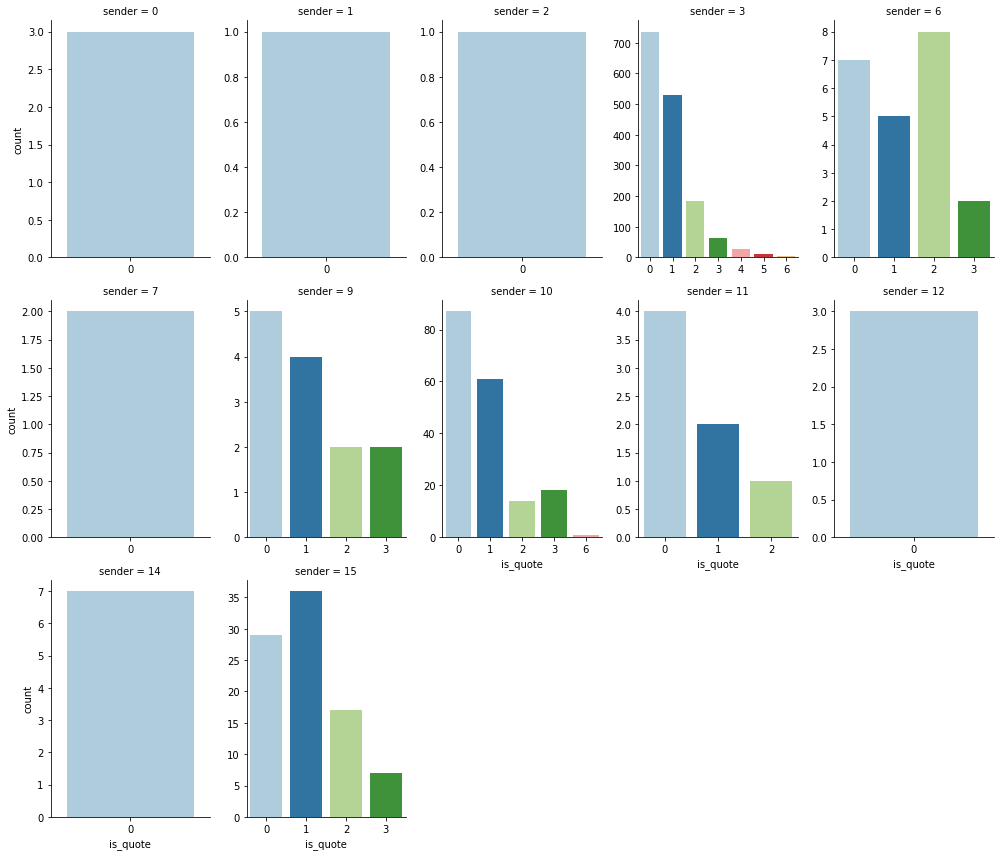

In [ ]:
sns.catplot(data=train.groupby(['is_quote','sender'])['sender'].agg({'count'}).reset_index(),
            x='is_quote',y='count',col='sender',
            col_wrap=5,height=4, aspect=.7,
            sharex=False,sharey=False,kind='bar',palette='Paired');

In [ ]:
train.groupby(['sender','is_quote'])['is_quote'].agg({'count'}).reset_index().groupby(['sender'])['is_quote'].agg({'count'}).reset_index().sort_values('count',ascending=False)

sender  count
3        3      7
7       10      5
4        6      4
6        9      4
11      15      4
8       11      3
0        0      1
1        1      1
2        2      1
5        7      1
9       12      1
10      14      1

#### The above plot and summary explain that more than 2 quotes in the email used by the sender category 3, 6, 9 to 11, and 15.

### Let's see how many emails contain timers.

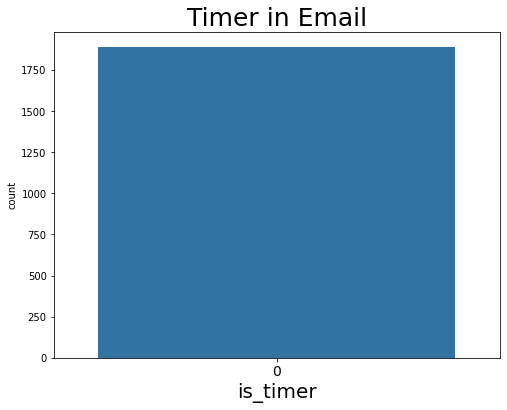

In [ ]:
count_plot(train,'is_timer' ,title='Timer in Email')

In [ ]:
train['is_timer'].value_counts()

0    1888
Name: is_timer, dtype: int64

#### The above plot and summary explain that none of the emails have used the timer.

### Let's see how many emoticons used in the email.

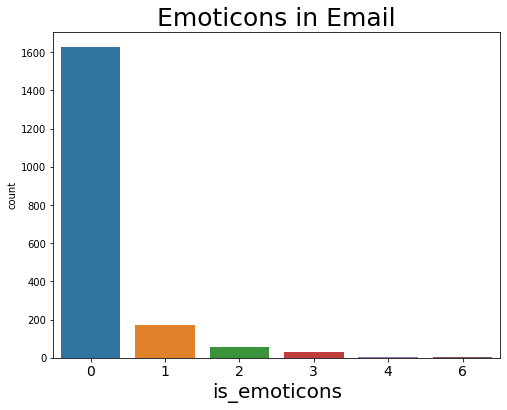

In [ ]:
count_plot(train,'is_emoticons' ,title='Emoticons in Email')

In [ ]:
train['is_emoticons'].value_counts()

0    1626
1     172
2      54
3      30
4       4
6       2
Name: is_emoticons, dtype: int64

#### The above plot and summary explain that more number of email campaigning doesn't have any emoticons. If the email used emoticons then it will be mostly 1 or 2.

### Click rate distribution of different emoticons.

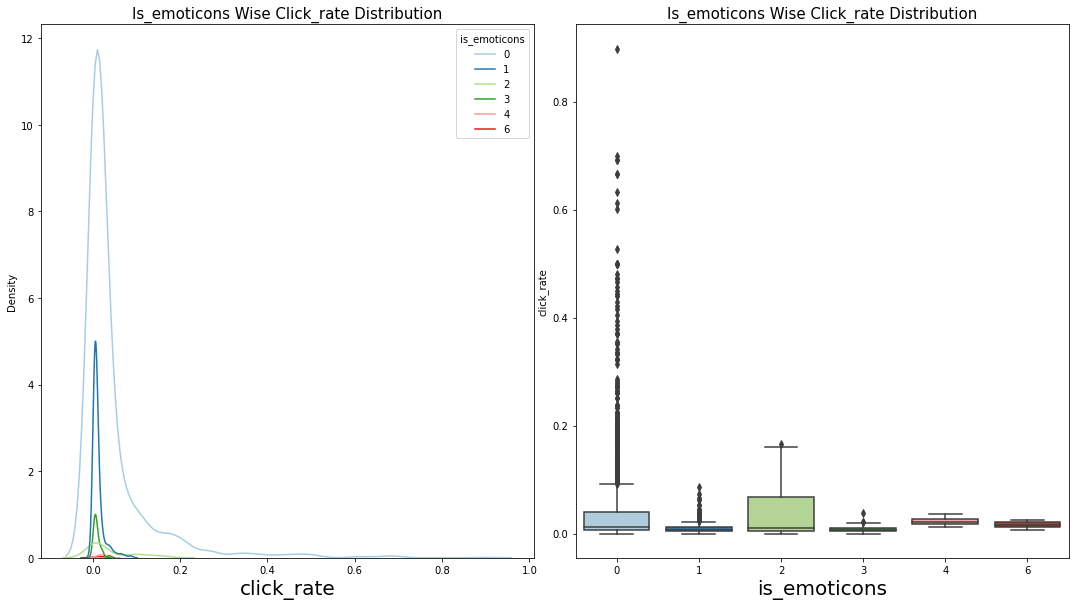

In [ ]:
side_by_side_plot(train,'is_emoticons','click_rate')

In [ ]:
group_summary(train,'is_emoticons','click_rate')

is_emoticons   count      mean       std       min       25%       50%  \
0             0  1626.0  0.045905  0.089443  0.000000  0.005714  0.011984   
2             2    54.0  0.037820  0.049866  0.000000  0.004593  0.009543   
4             4     4.0  0.022907  0.010678  0.011680  0.017164  0.021455   
5             6     2.0  0.015958  0.012891  0.006843  0.011400  0.015958   
1             1   172.0  0.011607  0.013622  0.000000  0.004507  0.007063   
3             3    30.0  0.009313  0.007845  0.000000  0.004553  0.006410   

        75%       max  
0  0.040276  0.897959  
2  0.067243  0.165689  
4  0.027197  0.037037  
5  0.020516  0.025073  
1  0.011762  0.086957  
3  0.010765  0.037916

#### The above chart and summary explain that the highest average click rate was recorded if the email doesn't use any emoticons.

### Let's compare various email senders and the number of emoticons used in the mail.

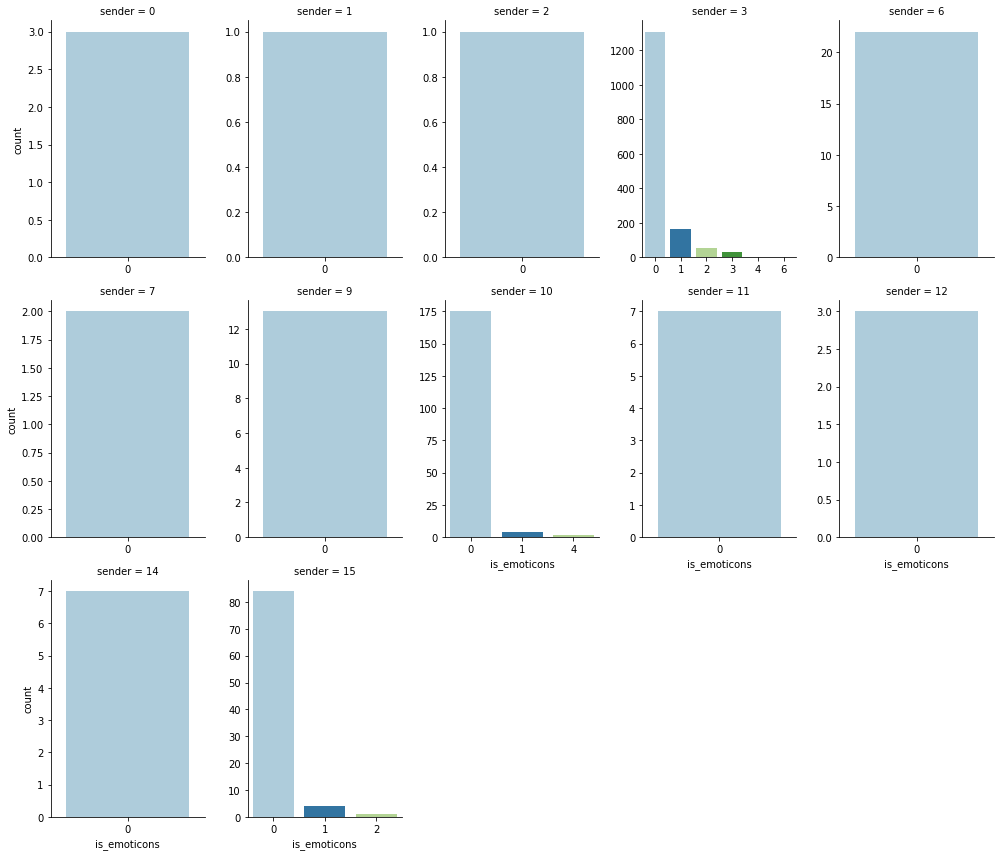

In [ ]:
sns.catplot(data=train.groupby(['is_emoticons','sender'])['sender'].agg({'count'}).reset_index(),
            x='is_emoticons',y='count',col='sender',
            col_wrap=5,height=4, aspect=.7,
            sharex=False,sharey=False,kind='bar',palette='Paired');

In [ ]:
train.groupby(['sender','is_emoticons'])['is_emoticons'].agg({'count'}).reset_index().groupby(['sender'])['is_emoticons'].agg({'count'}).reset_index().sort_values('count',ascending=False)

sender  count
3        3      6
7       10      3
11      15      3
0        0      1
1        1      1
2        2      1
4        6      1
5        7      1
6        9      1
8       11      1
9       12      1
10      14      1

#### The above plot and summary explain that more than 2 emoticons in the email are used by the sender categories 3, 10, and 15.

### Let's see whether the email contains a discount.

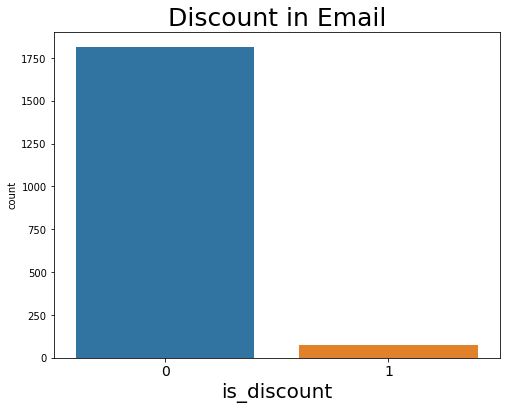

In [ ]:
count_plot(train,'is_discount' ,title='Discount in Email')

In [ ]:
train['is_discount'].value_counts()

0    1813
1      75
Name: is_discount, dtype: int64

#### The above plot and summary explain that most email campaigning doesn't contain any discount.

### Click rate distribution of discount email.

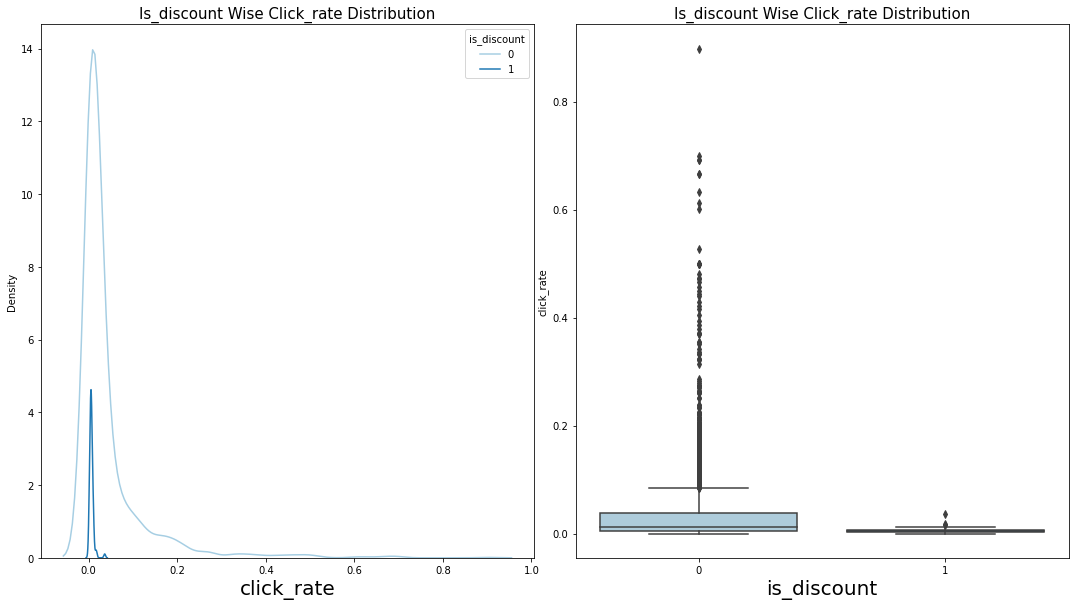

In [ ]:
side_by_side_plot(train,'is_discount','click_rate')

In [ ]:
group_summary(train,'is_discount','click_rate')

is_discount   count      mean       std  min       25%       50%       75%  \
0            0  1813.0  0.043362  0.085624  0.0  0.005546  0.011396  0.037254   
1            1    75.0  0.006242  0.004712  0.0  0.003768  0.005641  0.007355   

        max  
0  0.897959  
1  0.036036

#### The above chart and summary explain that the highest average click rate was recorded if the email doesn't have the discount.


### Let's see whether the email contains a price.

In [ ]:
train['is_price'].unique()

array([    0,  5499,  8000,  4999,  1399,  5000,  1000, 14999])

In [ ]:
train['is_price'].value_counts()

0        1875
5499        5
8000        2
5000        2
4999        1
1399        1
1000        1
14999       1
Name: is_price, dtype: int64

In [ ]:
train['is_price']=(train['is_price'] > 0).astype('int')

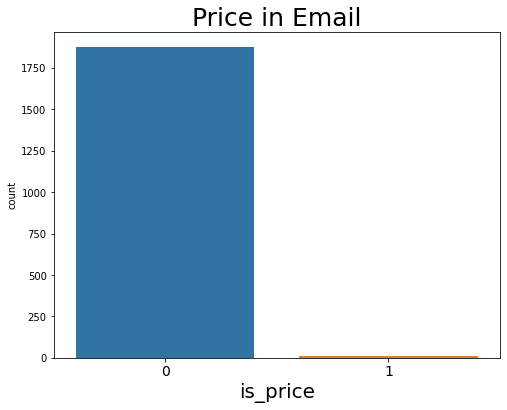

In [ ]:
count_plot(train,'is_price' ,title='Price in Email')

In [ ]:
train['is_price'].value_counts()

0    1875
1      13
Name: is_price, dtype: int64

#### The above plot and summary explain that most email campaigning doesn't contain any price details.

### Click rate distribution of price email.

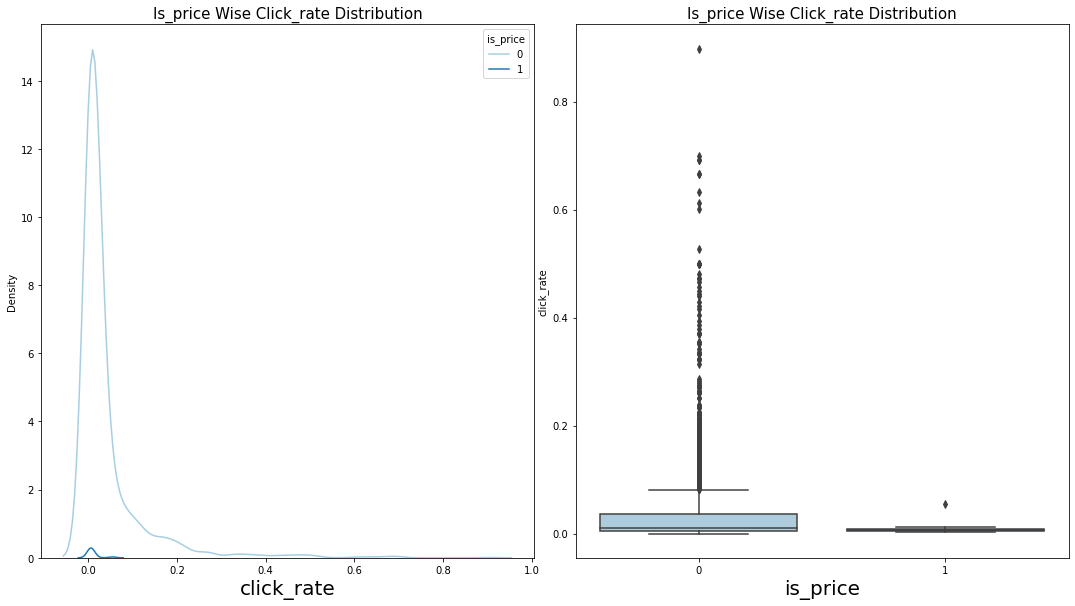

In [ ]:
side_by_side_plot(train,'is_price','click_rate')

In [ ]:
group_summary(train,'is_price','click_rate')

is_price   count      mean       std       min       25%       50%  \
0         0  1875.0  0.042109  0.084465  0.000000  0.005419  0.010751   
1         1    13.0  0.009912  0.013706  0.002062  0.003810  0.006363   

        75%       max  
0  0.035781  0.897959  
1  0.008472  0.054237

#### The above chart and summary explain that the highest average click rate was recorded if the email doesn't have the price deatails.


### Let's see whether the email contains any urgency.

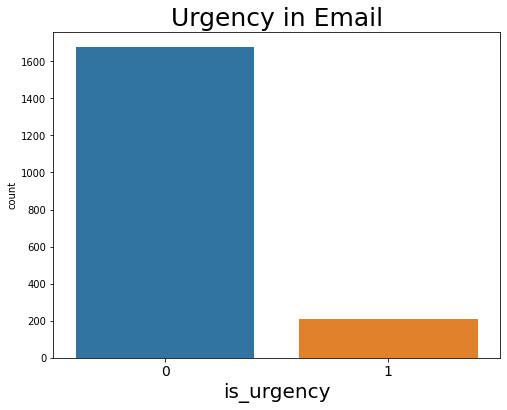

In [ ]:
count_plot(train,'is_urgency' ,title='Urgency in Email')

In [ ]:
train['is_urgency'].value_counts()

0    1676
1     212
Name: is_urgency, dtype: int64

#### The above plot and summary explain that most email campaigning doesn't contain any urgency.

### Click rate distribution of urgency email.

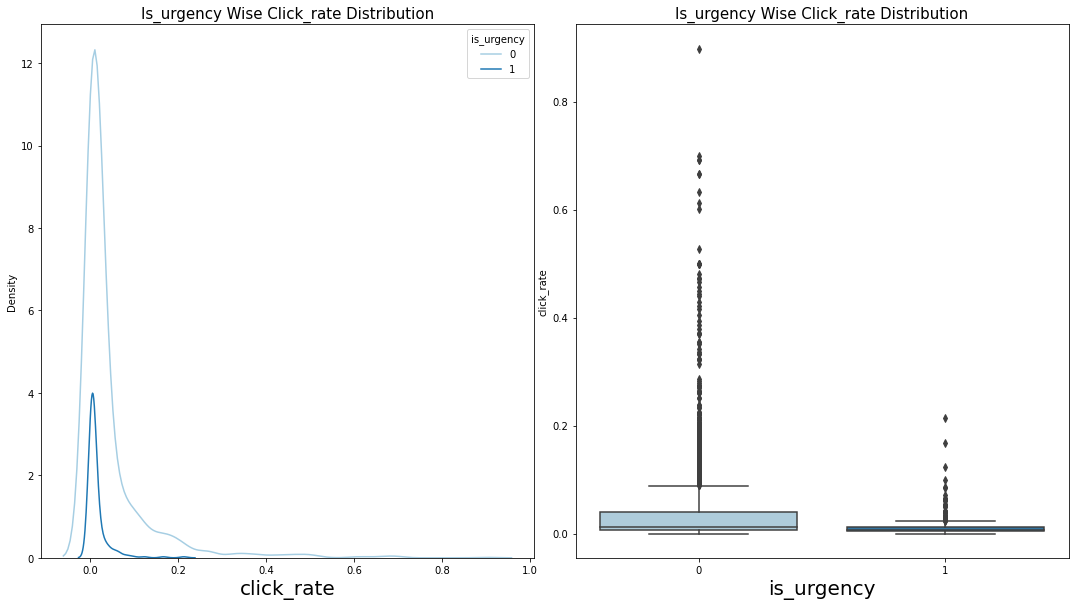

In [ ]:
side_by_side_plot(train,'is_urgency','click_rate')

In [ ]:
group_summary(train,'is_urgency','click_rate')

is_urgency   count      mean       std  min       25%       50%       75%  \
0           0  1676.0  0.045310  0.088367  0.0  0.005700  0.011984  0.039009   
1           1   212.0  0.014831  0.024912  0.0  0.004364  0.006943  0.011676   

        max  
0  0.897959  
1  0.213434

#### The above chart and summary explain that the highest average click rate was recorded if the email doesn't have urgency.


### Let's see how many target audience clusters.

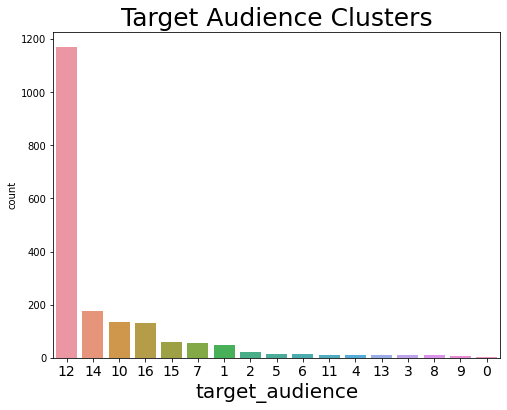

In [ ]:
count_plot(train,'target_audience' ,title='Target Audience Clusters')

In [ ]:
train['target_audience'].value_counts()

12    1169
14     175
10     136
16     132
15      61
7       56
1       50
2       20
5       16
6       14
11      12
4       10
13      10
3        9
8        9
9        6
0        3
Name: target_audience, dtype: int64

#### The above plot and summary explain that more number of email campaigning clustered under target group 12.

### Click rate distribution of different target audience clusters.

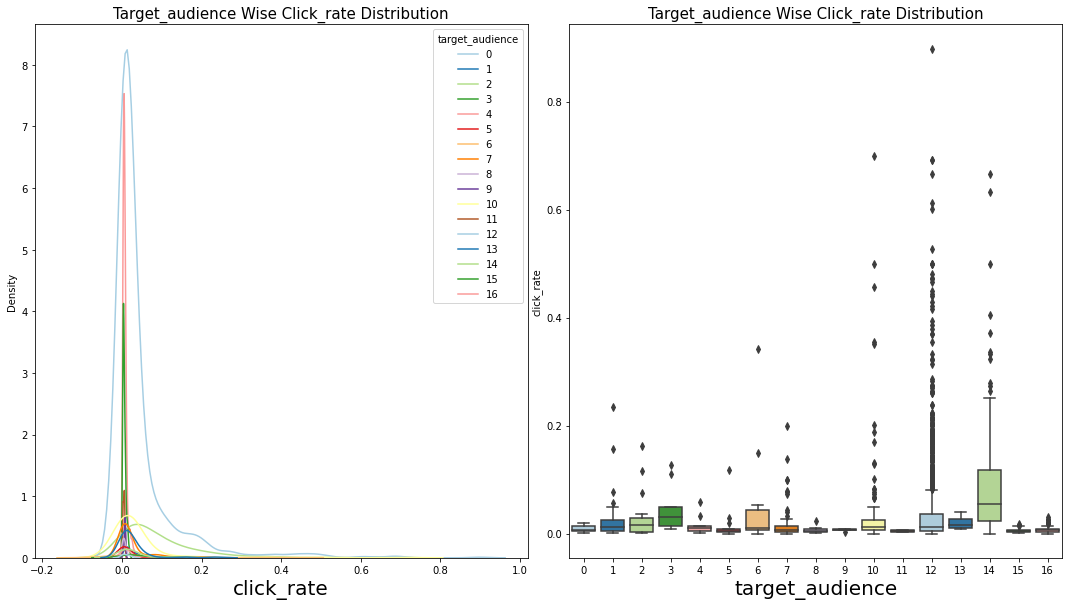

In [ ]:
side_by_side_plot(train,'target_audience','click_rate')

In [ ]:
group_summary(train,'target_audience','click_rate')

target_audience   count      mean       std       min       25%       50%  \
14               14   175.0  0.091743  0.105426  0.000000  0.023114  0.055344   
6                 6    14.0  0.050748  0.092420  0.000000  0.007445  0.010116   
3                 3     9.0  0.044939  0.043905  0.008839  0.013490  0.030083   
12               12  1169.0  0.043971  0.088388  0.000000  0.005641  0.011375   
10               10   136.0  0.040149  0.094378  0.000000  0.007318  0.011240   
2                 2    20.0  0.029384  0.042213  0.001207  0.003037  0.015637   
1                 1    50.0  0.024340  0.039719  0.001556  0.005319  0.011946   
7                 7    56.0  0.022007  0.037761  0.000000  0.003593  0.007382   
13               13    10.0  0.019284  0.011691  0.008007  0.010026  0.015031   
4                 4    10.0  0.015234  0.017484  0.001213  0.005188  0.010035   
5                 5    16.0  0.013815  0.028651  0.000000  0.003286  0.004288   
0                 0     3.0  0.009245  0.009486  0.001261  0.004002  0.006742   
16               16   132.0  0.006947  0.005250  0.000000  0.003721  0.005720   
8                 8     9.0  0.006852  0.006858  0.001439  0.003051  0.004590   
9                 9     6.0  0.006730  0.002016  0.002923  0.006474  0.007369   
15               15    61.0  0.005687  0.003793  0.001579  0.002905  0.004513   
11               11    12.0  0.004501  0.001829  0.002067  0.002857  0.004936   

         75%       max  
14  0.116998  0.666667  
6   0.044038  0.342105  
3   0.048769  0.127820  
12  0.036644  0.897959  
10  0.025314  0.700000  
2   0.028990  0.162791  
1   0.025305  0.234694  
7   0.014198  0.200000  
13  0.026908  0.040553  
4   0.013298  0.058355  
5   0.008102  0.117798  
0   0.013237  0.019732  
16  0.008714  0.030589  
8   0.008628  0.023410  
9   0.007895  0.008472  
15  0.007479  0.018580  
11  0.005713  0.007271

#### The above chart and summary explain that the highest average click rate was recorded if the email clustered under the target audience group 3, 6, 10, 12, 14.

### Let's compare various email senders and the number of target audience clusters.

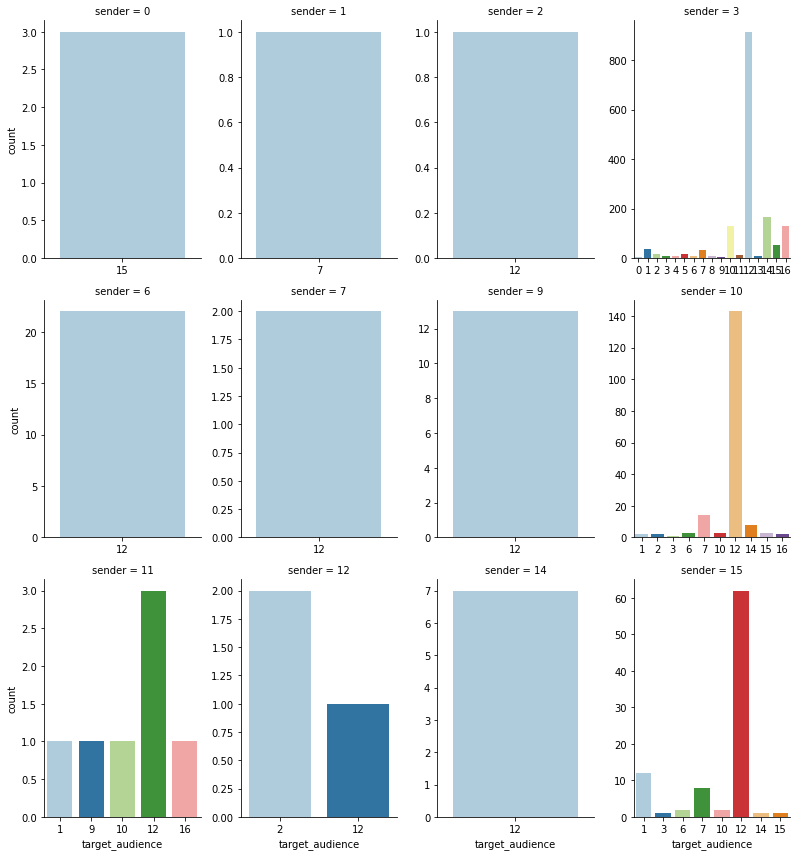

In [ ]:
sns.catplot(data=train.groupby(['target_audience','sender'])['sender'].agg({'count'}).reset_index(),
            x='target_audience',y='count',col='sender',
            col_wrap=4,height=4, aspect=.7,
            sharex=False,sharey=False,kind='bar',palette='Paired');

In [ ]:
train.groupby(['sender','target_audience'])['target_audience'].agg({'count'}).reset_index().groupby(['sender'])['target_audience'].agg({'count'}).reset_index().sort_values('count',ascending=False)

sender  count
3        3     17
7       10     10
11      15      8
8       11      5
9       12      2
0        0      1
1        1      1
2        2      1
4        6      1
5        7      1
6        9      1
10      14      1

#### The above plot and summary explain that more number of target audience clusters in the email campaigning of the sender categories 3, 10, 11, and 15.